In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,stats,chi2_contingency,levene,kruskal,shapiro,f_oneway,ttest_ind
import warnings
warnings.filterwarnings("ignore")

Loading the Dataset

In [ ]:
df=pd.read_csv('/content/bike_sharing.csv')

Top 5 rows of the Dataset

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Bottom 5 rows of the Dataset

In [ ]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,19-12-2012 19:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,19-12-2012 20:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,19-12-2012 21:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,19-12-2012 22:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,19-12-2012 23:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


Shape of the Dataset

In [ ]:
df.shape

(10886, 12)

Information about the Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


All statistics of the Dataset

In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df.describe(include='object')

,datetime
count,10886
unique,10886
top,01-01-2011 00:00
freq,1


Checking for the Null values in the Dataset

In [ ]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

As there are no null values Present in the Dataset

Checking for duplicated

In [ ]:
df.duplicated().sum()

0

No. of unique values in the columns

In [ ]:
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

Creating columns from datetime field for better analysis of the data

In [ ]:
df['datetime']=pd.to_datetime(df['datetime'])

In [ ]:
df['year']=df['datetime'].dt.year
df['month']=df['datetime'].dt.month
df['day']=df['datetime'].dt.day
df['hour_of_the_day']=df['datetime'].dt.hour
df['quarter']=df['datetime'].dt.quarter

Dropping the datetime column as the require data has been extracted

In [ ]:
df.drop(['datetime'],axis=1, inplace=True)

In [ ]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour_of_the_day,quarter
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,1
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,1
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,1
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,1


Modifying the datatype of the following features as per understanding that they are categorical data

In [ ]:
df['season']=df['season'].astype('object')
df['holiday']=df['holiday'].astype('object')
df['workingday']=df['workingday'].astype('object')
df['weather']=df['weather'].astype('object')
df['year']=df['year'].astype('object')
df['month']=df['month'].astype('object')
df['day']=df['day'].astype('object')
df['hour_of_the_day']=df['hour_of_the_day'].astype('object')
df['quarter']=df['quarter'].astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           10886 non-null  object 
 1   holiday          10886 non-null  object 
 2   workingday       10886 non-null  object 
 3   weather          10886 non-null  object 
 4   temp             10886 non-null  float64
 5   atemp            10886 non-null  float64
 6   humidity         10886 non-null  int64  
 7   windspeed        10886 non-null  float64
 8   casual           10886 non-null  int64  
 9   registered       10886 non-null  int64  
 10  count            10886 non-null  int64  
 11  year             10886 non-null  object 
 12  month            10886 non-null  object 
 13  day              10886 non-null  object 
 14  hour_of_the_day  10886 non-null  object 
 15  quarter          10886 non-null  object 
dtypes: float64(3), int64(4), object(9)
memory usage: 1.3+ MB


Statisticks of the object data

In [ ]:
df.describe(include='object').T

,count,unique,top,freq
season,10886,4,4,2734
holiday,10886,2,0,10575
workingday,10886,2,1,7412
weather,10886,4,1,7192
year,10886,2,2012,5464
month,10886,12,5,911
day,10886,19,12,576
hour_of_the_day,10886,24,12,456
quarter,10886,4,3,2731


Outlier Detection and Treatment

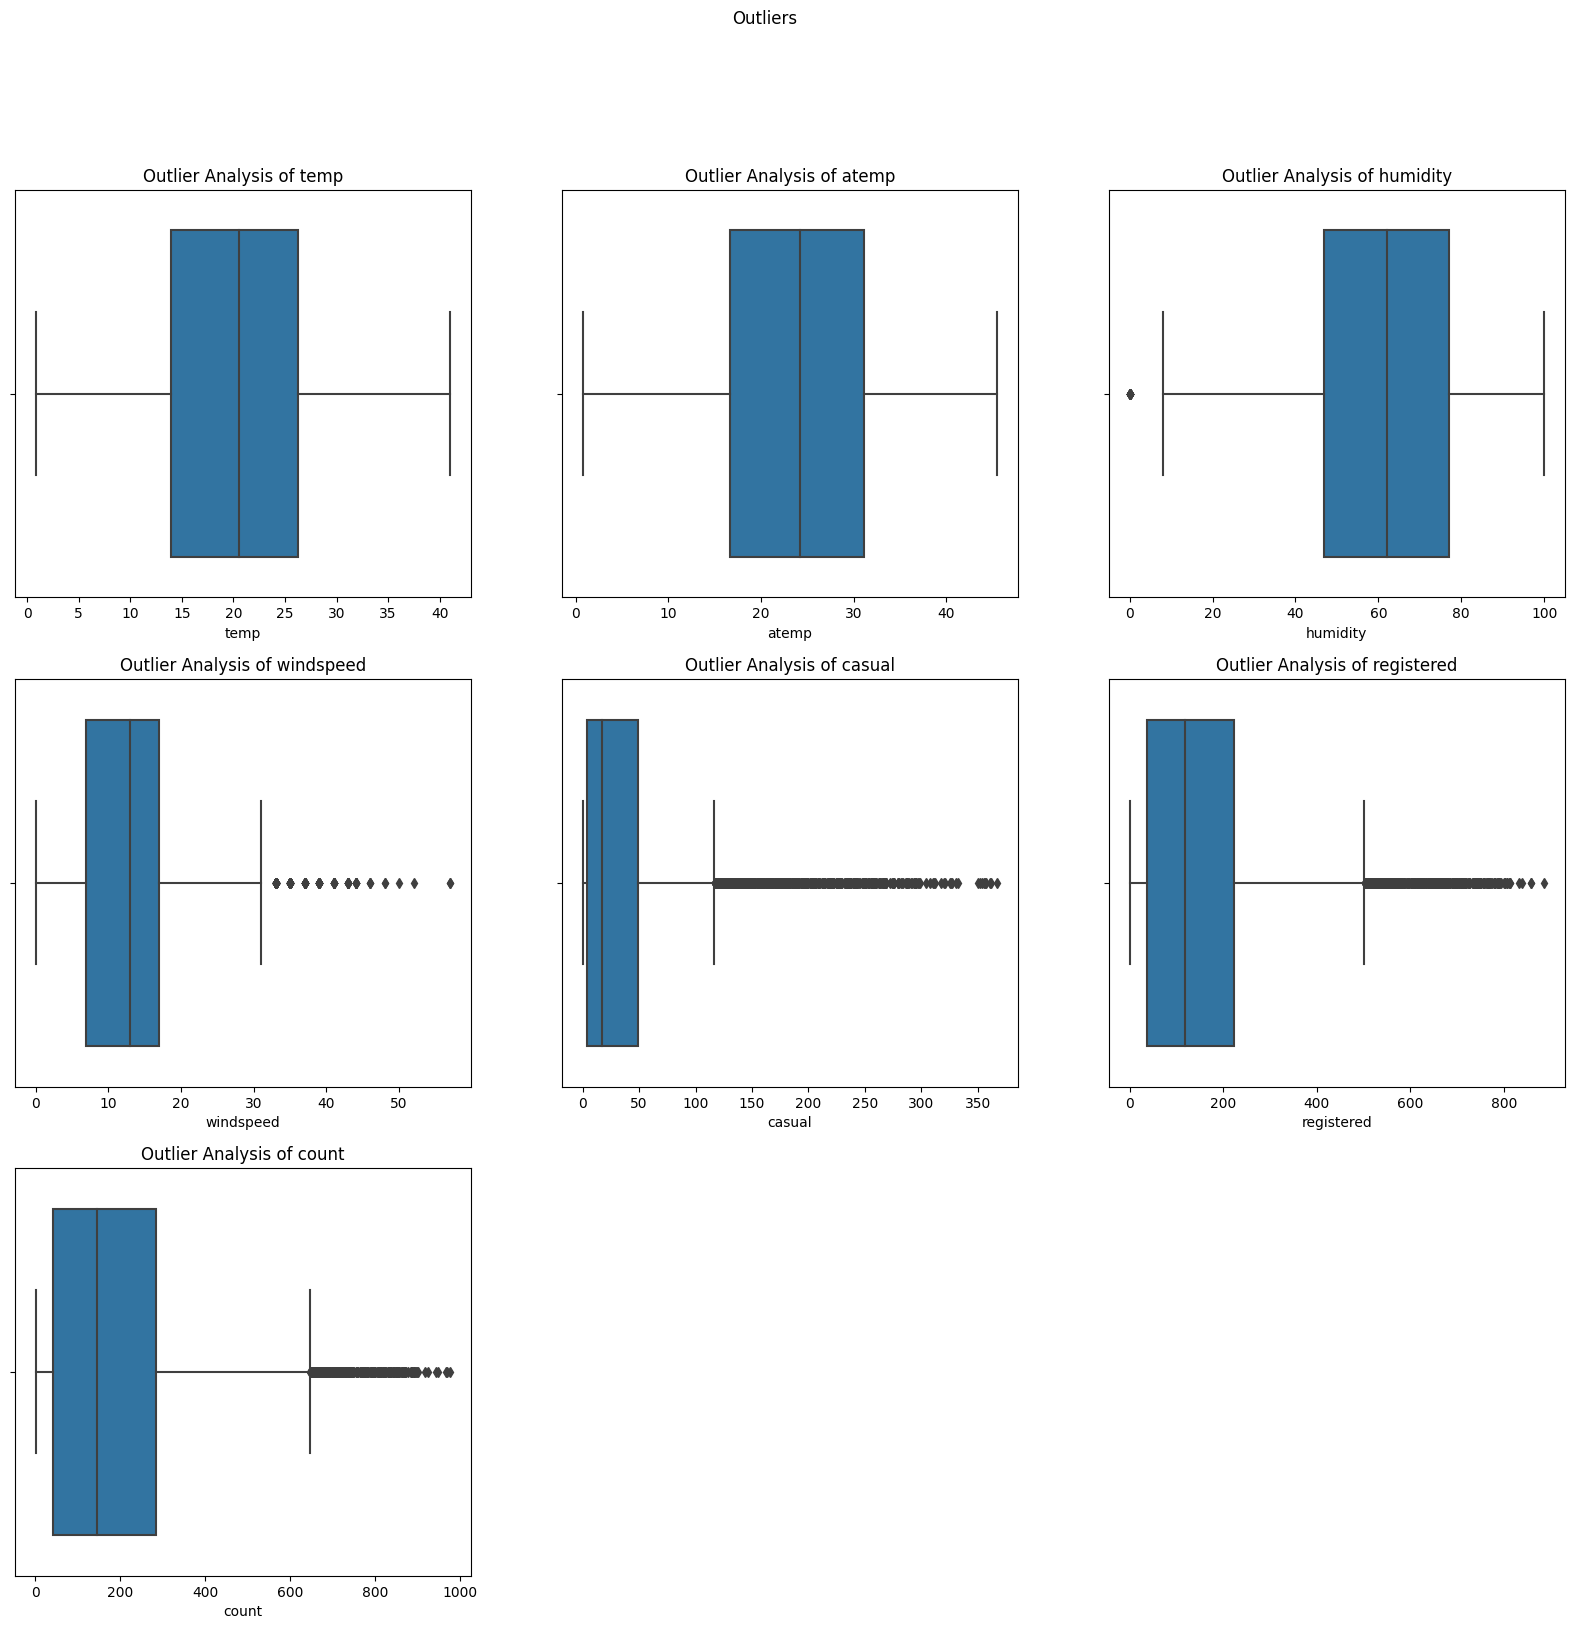

In [ ]:
plt.figure(figsize = (20,18))
plt.suptitle("Outliers")
features = ['temp', 'atemp','humidity', 'windspeed', 'casual', 'registered', 'count']
for i in range(len(features)):
     plt.subplot(3, 3, i+1)
     sns.boxplot(x = df[features[i]])
     plt.title('Outlier Analysis of {}'.format(features[i]))

plt.show()

Creating a function to provide the details of whiskers and quartile range for all columns provided of the dataframe

In [ ]:
def outlier_info(df,columns_list):
    for col in columns_list:
        print("\nOutlier data for {}".format(col))
        Q1 = df[col].quantile(0.25)
        Q2 = df[col].median()
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_whisker = Q1 - (1.5 * IQR)
        upper_whisker = Q3 + (1.5 * IQR)
        print("Lower Whisker(Income): {} \nQuartile-1 : {}\nQuartile-2 : {}\nQuartile-3 : {}\nIQR : {}\nUpper Whisker(Income) : {}".format(lower_whisker,Q1,Q2,Q3,IQR,upper_whisker))

In [ ]:
##Invoking the above function and provide the dataframe and list of columns we just detected with outliers

In [ ]:
outlier_info(df,["windspeed","casual","registered","count"])


Outlier data for windspeed
Lower Whisker(Income): -7.993100000000002 
Quartile-1 : 7.0015
Quartile-2 : 12.998
Quartile-3 : 16.9979
IQR : 9.996400000000001
Upper Whisker(Income) : 31.992500000000003

Outlier data for casual
Lower Whisker(Income): -63.5 
Quartile-1 : 4.0
Quartile-2 : 17.0
Quartile-3 : 49.0
IQR : 45.0
Upper Whisker(Income) : 116.5

Outlier data for registered
Lower Whisker(Income): -243.0 
Quartile-1 : 36.0
Quartile-2 : 118.0
Quartile-3 : 222.0
IQR : 186.0
Upper Whisker(Income) : 501.0

Outlier data for count
Lower Whisker(Income): -321.0 
Quartile-1 : 42.0
Quartile-2 : 145.0
Quartile-3 : 284.0
IQR : 242.0
Upper Whisker(Income) : 647.0


Any data with windspeed > 31.99 is an outlier.

Any data with casual riders count > 116.5 is an outlier.

Any data with registered riders count > 501 is an outlier.

Any data with count of riders > 647 is an outlier.

In [ ]:
##   Taking the count of records that are considered as outliers as per the above conditions

In [ ]:
print("Count of datapoints on column 'Windspeed' is {}.".format(df.loc[df["windspeed"] > 31.99,["season"]].count()["season"]))
print("Count of datapoints on column 'casual' is {}.".format(df.loc[df["casual"] > 31.99,["season"]].count()["season"]))
print("Count of datapoints on column 'registered' is {}.".format(df.loc[df["registered"] > 31.99,["season"]].count()["season"]))
print("Count of datapoints on column 'count' is {}.".format(df.loc[df["count"] > 31.99,["season"]].count()["season"]))

Count of datapoints on column 'Windspeed' is 227.
Count of datapoints on column 'casual' is 3818.
Count of datapoints on column 'registered' is 8323.
Count of datapoints on column 'count' is 8536.


creating a function to assist analyzing the data if outliers are removed vs if they were not removed, by passing the dataframe and a dictionary with column name and their threshold values


In [ ]:
# creating a function to assist analyzing the data if outliers are removed vs if they were not removed, by passing the dataframe and a dictionary with column name and their threshold values

def before_after_outlier_analysis(df,columns_dict):
    for columns,threshold in columns_dict.items():
        print("\nOutlier Impact Analysis on data for {}".format(columns))

       # Before
        before_mean = df[columns].mean()
        before_stddev = df[columns].std()
        before_median = df[columns].median()

        print("If outliers are NOT removed \n \nMean: {} \nStandard Deviation : {}\nMedian : {}\n".format(before_mean,before_stddev,before_median))

        # If outliers are removed

        after_mean = df.loc[df[columns] < threshold][columns].mean()
        after_stddev = df.loc[df[columns] < threshold][columns].std()
        after_median = df.loc[df[columns] < threshold][columns].median()

        print("If outliers are removed \n \nMean: {} \nStandard Deviation : {}\nMedian : {}".format(after_mean,after_stddev,after_median))
        print("---------------------------------------------------------------------------------------------------------")

In [ ]:
# Creating a dictionary to pass to the above written functions as parameters, and invoking the same.

In [ ]:
columns_dict = {
    "windspeed":31.99,
    "casual":116.5,
    "registered":501,
    "count":647
}

before_after_outlier_analysis(df,columns_dict)


Outlier Impact Analysis on data for windspeed
If outliers are NOT removed 
 
Mean: 12.7993954069447 
Standard Deviation : 8.164537326838689
Median : 12.998

If outliers are removed 
 
Mean: 12.292751927948213 
Standard Deviation : 7.441015147553967
Median : 11.0014
---------------------------------------------------------------------------------------------------------

Outlier Impact Analysis on data for casual
If outliers are NOT removed 
 
Mean: 36.02195480433584 
Standard Deviation : 49.960476572649526
Median : 17.0

If outliers are removed 
 
Mean: 25.241984808128638 
Standard Deviation : 27.93705825036805
Median : 14.0
---------------------------------------------------------------------------------------------------------

Outlier Impact Analysis on data for registered
If outliers are NOT removed 
 
Mean: 155.5521771082124 
Standard Deviation : 151.03903308192454
Median : 118.0

If outliers are removed 
 
Mean: 136.28264194226725 
Standard Deviation : 117.84035725136775
Median 

Removing outliers data from the dataset, doesn't impact the data, as the average on before removing the outliers and after removing outliers are almost similar. Thus, not removing the outliers on windspeed.

In columns casual, registered, and count, we have found the average and standard deviation are significantly impacted by the outliers. Therefore, we need to remove all datapoints adhering to outlier's threshold value from all these columns.

In [ ]:
# Removing the outliers data and copying the data into another dataframe, that can be considered as final_df

final_df = df[ ~(df['casual']> 116.5) ]
final_df = final_df[ ~(final_df['registered']> 501) ]
final_df = final_df[ ~(final_df['count']> 647) ]

final_df.reset_index(drop=True, inplace=True)

Correlation Analysis

In [ ]:
# Converting the categorical data to numerical for correlation analysis

final_df["season"] = final_df["season"].astype("int")
final_df["holiday"] = final_df["holiday"].astype("int")
final_df["workingday"] = final_df["workingday"].astype("int")
final_df["weather"] = final_df["weather"].astype("int")
final_df["year"] = final_df["year"].astype("int")
final_df["month"] = final_df["month"].astype("int")
final_df["day"] = final_df["day"].astype("int")
final_df["hour_of_the_day"] = final_df["hour_of_the_day"].astype("int")
final_df["quarter"] = final_df["quarter"].astype("int")

Pearson Method

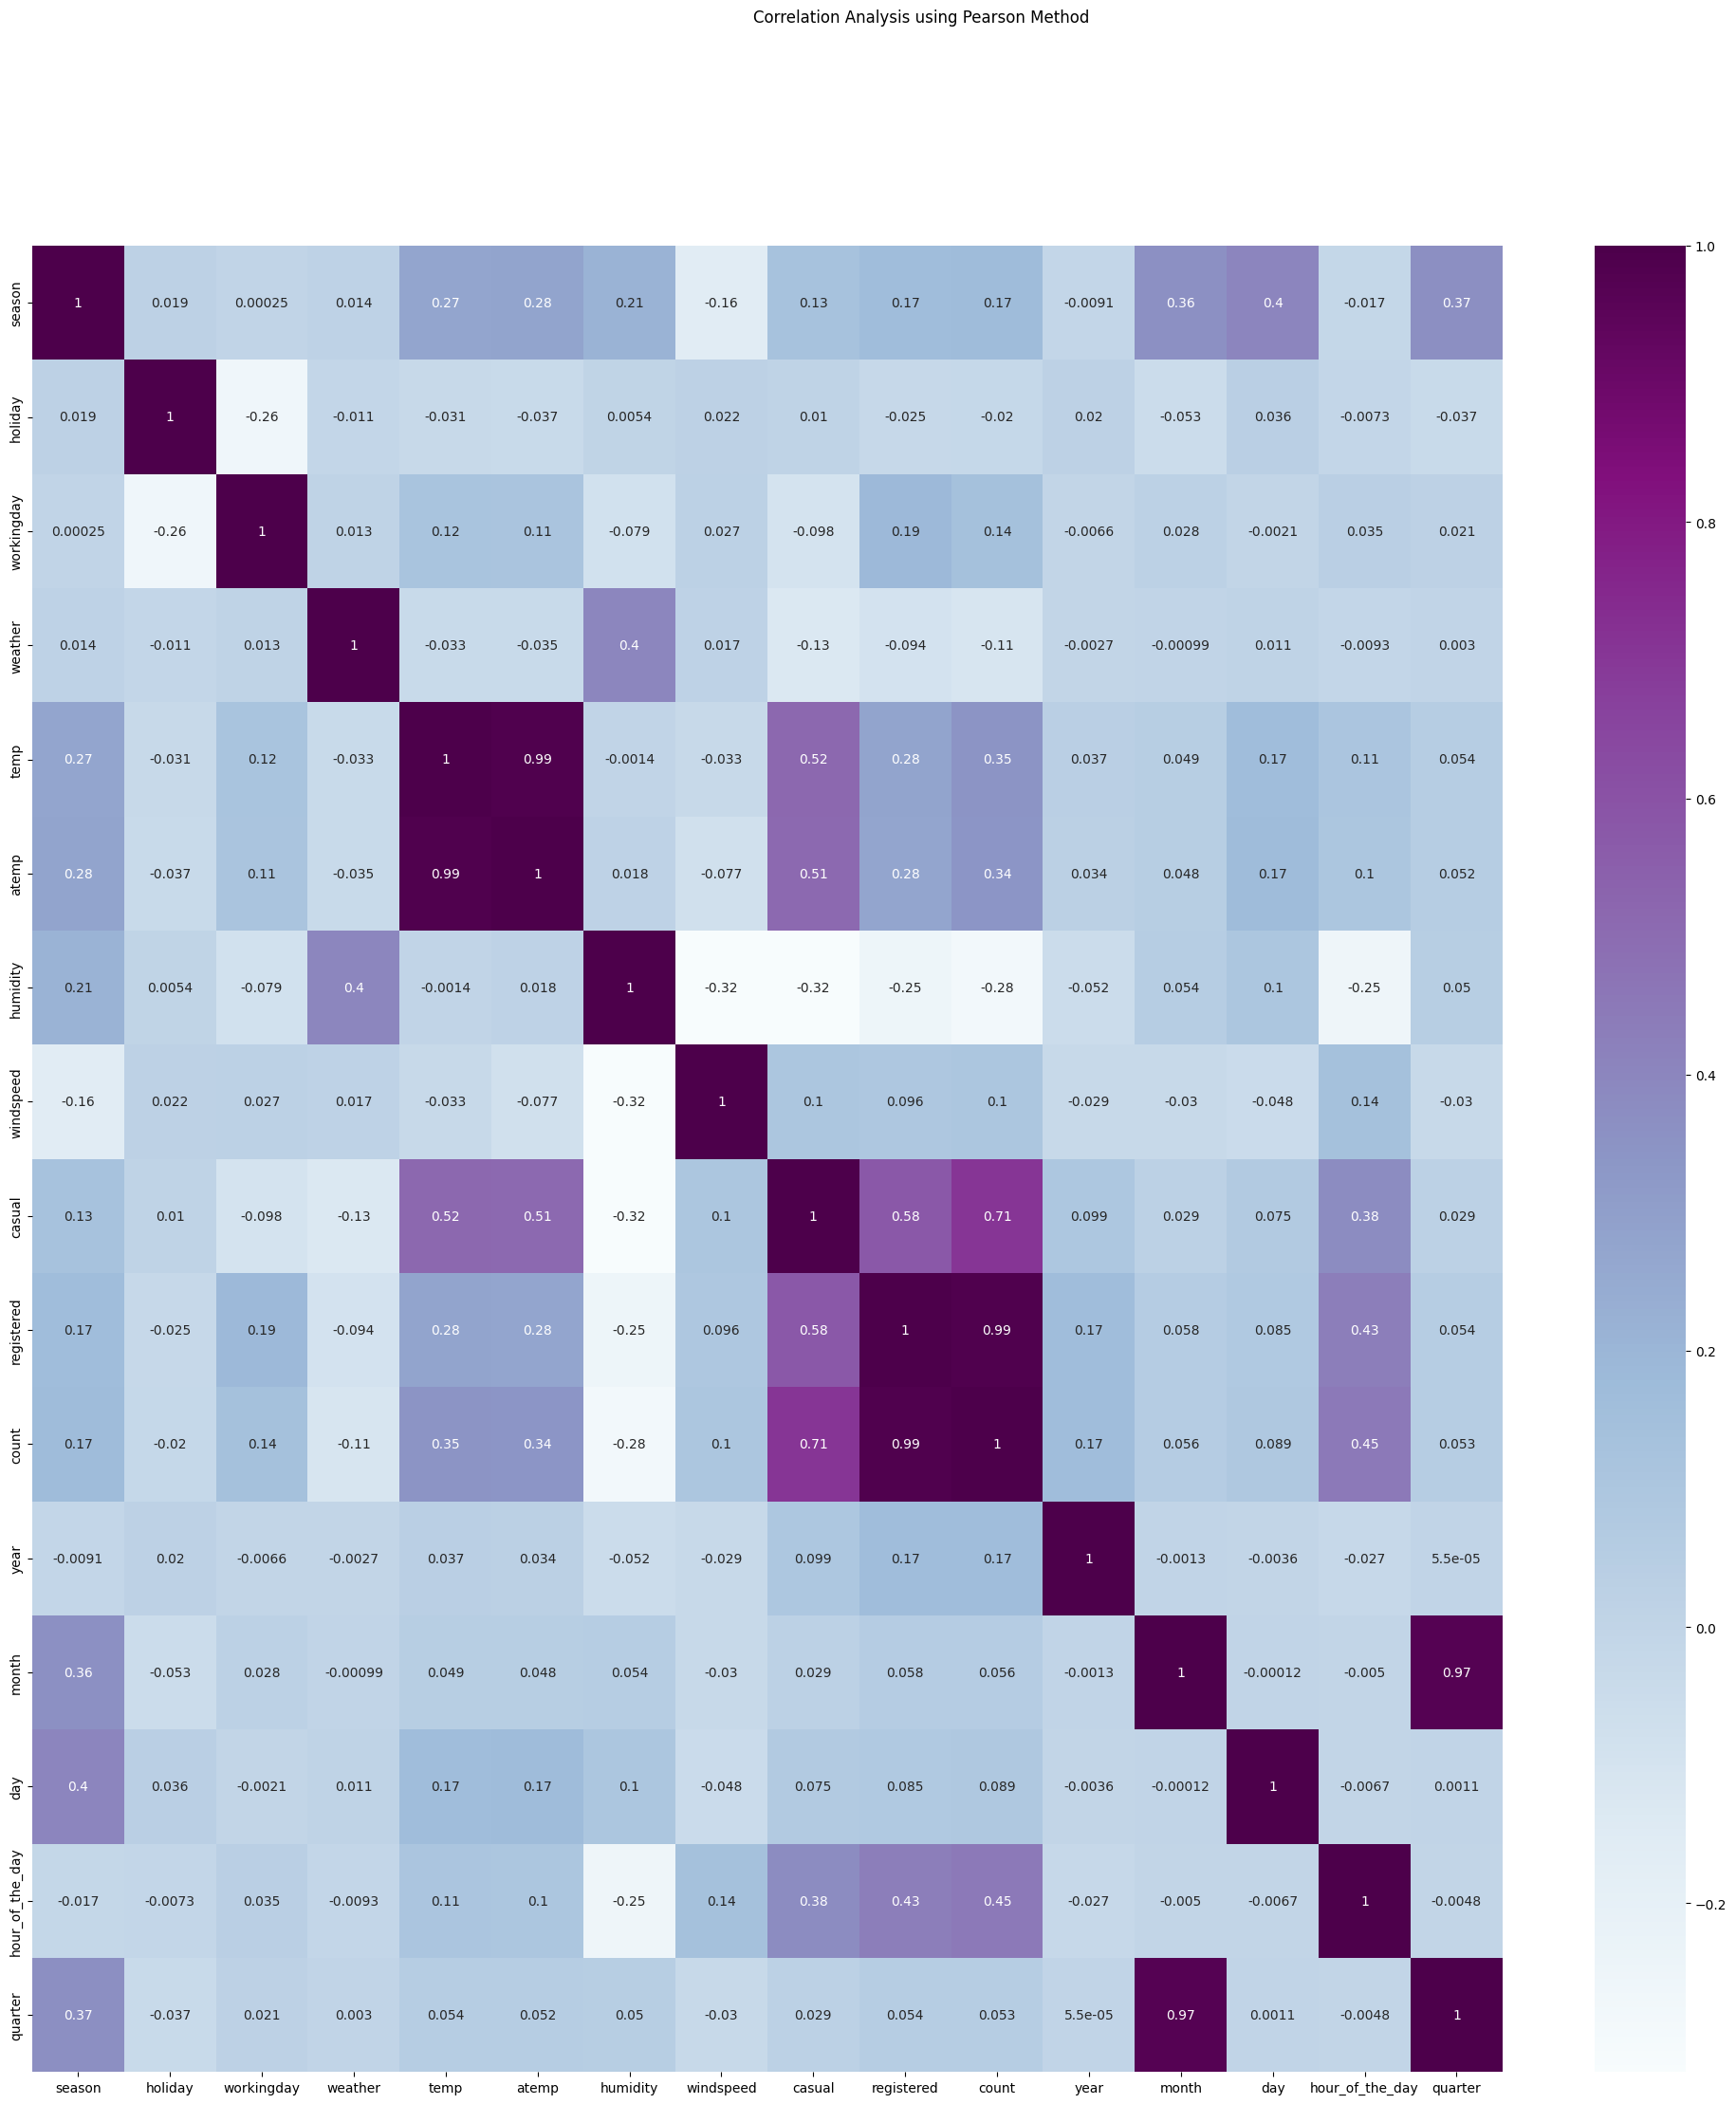

In [ ]:
# Plotting heatmap on the correlation analysis done using Pearson method

fig = plt.figure(figsize=(25,25))
fig.suptitle("Correlation Analysis using Pearson Method")
sns.heatmap(final_df.corr(),annot=True,cmap="BuPu")
plt.show()

Spearman Rank Method

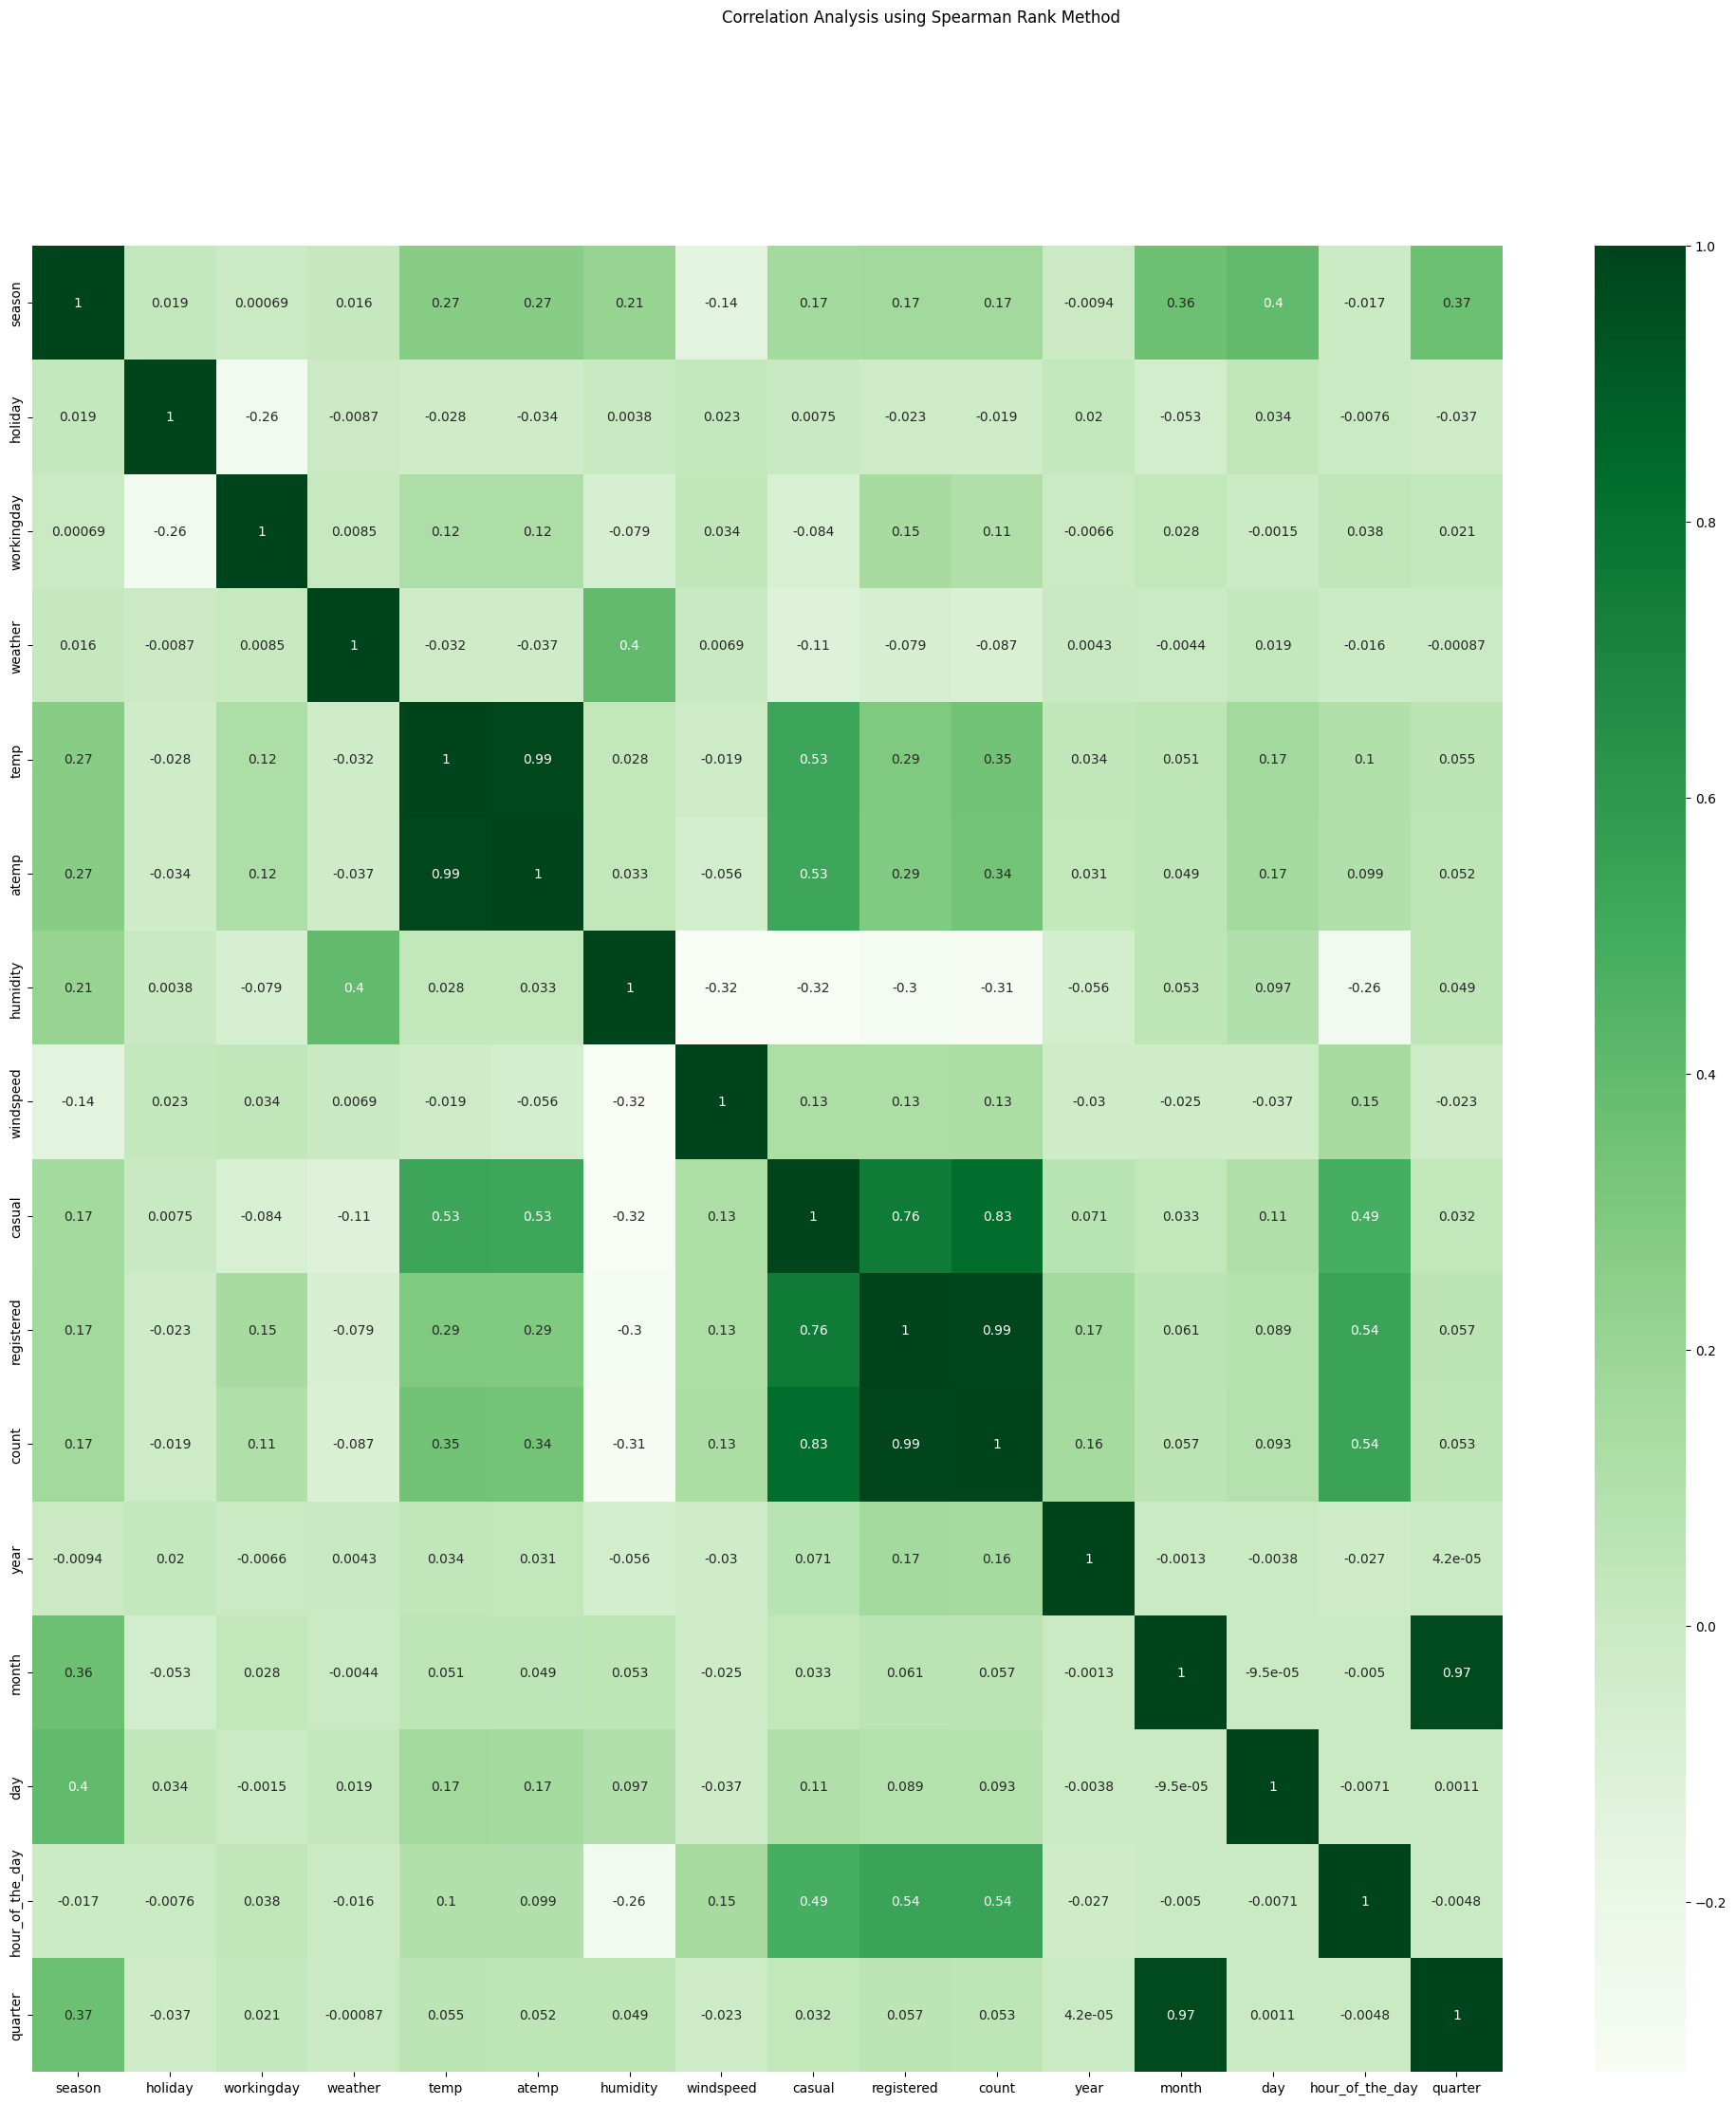

In [ ]:
# Plotting heatmap on the correlation analysis done using Spearman method

fig = plt.figure(figsize=(25,25))
fig.suptitle("Correlation Analysis using Spearman Rank Method")
sns.heatmap(final_df.corr(method="spearman"),annot=True,cmap="Greens")
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
sns.pairplot(final_df)
plt.show()

We have deployed both methods (Pearson and Spearman) to determine the correlation, also plotted heat maps against them and a pairplot. There are very little to no correlation among the features.

Following are the observations on few:

Season with month and quarter have strong positive correlation, as it is for temperature and felt temperature, which can stated obvious.

There is weak positive correlation among the count of casual riders with temperature and felt temperature.


In [ ]:
# Converting the columns that were converted earlier, back to categories

final_df["season"] = final_df["season"].astype("object")
final_df["holiday"] = final_df["holiday"].astype("object")
final_df["workingday"] = final_df["workingday"].astype("object")
final_df["weather"] = final_df["weather"].astype("object")
final_df["year"] = final_df["year"].astype("object")
final_df["month"] = final_df["month"].astype("object")
final_df["day"] = final_df["day"].astype("object")
final_df["hour_of_the_day"] = final_df["hour_of_the_day"].astype("object")
final_df["quarter"] = final_df["quarter"].astype("object")

Non-Graphical Analysis - Value Counts and Unique Attributes

In [ ]:
#  Creating an identity column as primary key that will act as unique identifier for better analysis
final_df["index"] = range(1, final_df.shape[0] + 1)

In [ ]:
final_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour_of_the_day,quarter,index
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,1,1
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,1,2
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,1,3
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,1,4
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9739,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,4,9740
9740,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,4,9741
9741,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,4,9742
9742,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,4,9743


In [ ]:
# Count of data as per the season

count_matrix = final_df.groupby(["season"])["index"].count().sort_values(ascending=False).reset_index()
count_matrix.columns=["season","count_of_data_points"]
count_matrix

,season,count_of_data_points
0,1,2600
1,4,2493
2,2,2346
3,3,2305


In [ ]:
# Statistical Central Tendency analysis of data as per the season

count_matrix = final_df.groupby(["season"])[["temp","atemp","humidity","windspeed","casual","registered","count"]].mean().reset_index()
count_matrix.columns=["season","Average Temperature","Average Feeling Temperature","Average Humidity","Average Windspeed","Average Casual Bike Rents","Average Regisetered Bike Rents","Average Count of Bike Rents"]
count_matrix

,season,Average Temperature,Average Feeling Temperature,Average Humidity,Average Windspeed,Average Casual Bike Rents,Average Regisetered Bike Rents,Average Count of Bike Rents
0,1,12.270354,14.929667,56.466538,14.596883,11.706154,91.553077,103.259231
1,2,22.330844,26.134740,63.380222,13.245712,30.348679,130.614237,160.962916
2,3,28.394768,32.134594,66.183514,11.135633,35.270716,142.140998,177.411714
3,4,16.299021,19.672012,67.446049,11.488538,20.165263,142.418371,162.583634


After removing outliers, all of the season have almost similar count of records, with spring season data being slightly higher than other seasons.

Average casual riders count and total count of riders is higher in the season of fall, on the other hand, registered riders,on an average, rented slightly more bikes in winter than in fall.

In [ ]:
# Count of data as per the Holidays

count_matrix = final_df.groupby(["holiday"])["index"].count().sort_values(ascending=False).reset_index()
count_matrix.columns=["Holiday","count_of_data_points"]
count_matrix

,Holiday,count_of_data_points
0,0,9484
1,1,260


In [ ]:
# Statistical Central Tendency analysis of data as per the holidays

count_matrix = final_df.groupby(["holiday"])[["temp","atemp","humidity","windspeed","casual","registered","count"]].mean().reset_index()
count_matrix.columns=["Holiday","Average Temperature","Average Feeling Temperature","Average Humidity","Average Windspeed","Average Casual Bike Rents","Average Regisetered Bike Rents","Average Count of Bike Rents"]
count_matrix

,Holiday,Average Temperature,Average Feeling Temperature,Average Humidity,Average Windspeed,Average Casual Bike Rents,Average Regisetered Bike Rents,Average Count of Bike Rents
0,0,19.577630,22.961647,63.221636,12.627670,23.888444,126.409321,150.297765
1,1,18.077846,21.052077,63.865385,13.746442,25.565385,108.757692,134.323077


After removing outliers, similar trend as earlier can be seen, as non-holiday datapoint counts were more than holidays.

Average casual riders count and total count of riders are higher in the holidays, on the other hand, registered riders,on an average, rented more bikes on holidays.

In [ ]:
# Count of data as per the Working Days

count_matrix = final_df.groupby(["workingday"])["index"].count().sort_values(ascending=False).reset_index()
count_matrix.columns=["Working Day (1-Working Day, 0 - Holiday)","count_of_data_points"]
count_matrix

,"Working Day (1-Working Day, 0 - Holiday)",count_of_data_points
0,1,6958
1,0,2786


In [ ]:
# Statistical Central Tendency analysis of data as per the working day

count_matrix = final_df.groupby(["workingday"])[["temp","atemp","humidity","windspeed","casual","registered","count"]].mean().reset_index()
count_matrix.columns=["Working Day (1-Working Day, 0- Holiday)","Average Temperature","Average Feeling Temperature","Average Humidity","Average Windspeed","Average Casual Bike Rents","Average Regisetered Bike Rents","Average Count of Bike Rents"]
count_matrix

,"Working Day (1-Working Day, 0- Holiday)",Average Temperature,Average Feeling Temperature,Average Humidity,Average Windspeed,Average Casual Bike Rents,Average Regisetered Bike Rents,Average Count of Bike Rents
0,0,18.101515,21.412215,65.637473,12.313655,28.110194,92.365398,120.475592
1,1,20.112627,23.510688,62.278385,12.795207,22.260707,139.381000,161.641707


After removing outliers, similar trend as earlier can be seen, as working day's datapoint counts were more than of non-working days.

Average casual riders count is higher in the non-working days, on the other hand, registered riders and total count of riders,on an average, rented significantly more bikes on working days.

In [ ]:
# Count of data as per the weather

count_matrix = final_df.groupby(["weather"])["index"].count().sort_values(ascending=False).reset_index()
count_matrix.columns=["Weather","count_of_data_points"]
count_matrix

,Weather,count_of_data_points
0,1,6314
1,2,2604
2,3,825
3,4,1


In [ ]:
# Statistical Central Tendency analysis of data as per the weather

count_matrix = final_df.groupby(["weather"])[["temp","atemp","humidity","windspeed","casual","registered","count"]].mean().reset_index()
count_matrix.columns=["weather","Average Temperature","Average Feeling Temperature","Average Humidity","Average Windspeed","Average Casual Bike Rents","Average Regisetered Bike Rents","Average Count of Bike Rents"]
count_matrix

,weather,Average Temperature,Average Feeling Temperature,Average Humidity,Average Windspeed,Average Casual Bike Rents,Average Regisetered Bike Rents,Average Count of Bike Rents
0,1,19.751558,23.133510,58.065410,12.697171,25.917960,131.556383,157.474343
1,2,19.108771,22.528318,69.869432,12.126249,22.528418,124.436636,146.965054
2,3,19.267515,22.426321,81.876364,14.039034,13.198788,87.642424,100.841212
3,4,8.200000,11.365000,86.000000,6.003200,6.000000,158.000000,164.000000


After removing outliers, all of the weathers have almost similar trend count of records as before, with most of the datapoints are for the clear and cloudy weather and least for heavy rainy weather.

Casual riders count, registered riders count and total count of riders,on an average, are higher in the clear and cloudy weather,followed by mist and cloudy weather.

In [ ]:
# Count of data as per the Hour of the day

count_matrix = final_df.groupby(["hour_of_the_day"])["index"].count().sort_values(ascending=False).reset_index()
count_matrix.columns=["hour_of_the_day","count_of_data_points"]
count_matrix

,hour_of_the_day,count_of_data_points
0,23,456
1,6,455
2,22,455
3,0,455
4,1,454
5,21,454
6,9,453
7,5,452
8,2,448
9,20,446


In [ ]:
# Statistical Central Tendency analysis of data as per the hour of the day

count_matrix = final_df.groupby(["hour_of_the_day"])[["temp","atemp","humidity","windspeed","casual","registered","count"]].mean().reset_index()
count_matrix.columns=["hour_of_the_day","Average Temperature","Average Feeling Temperature","Average Humidity","Average Windspeed","Average Casual Bike Rents","Average Regisetered Bike Rents","Average Count of Bike Rents"]
count_matrix

,hour_of_the_day,Average Temperature,Average Feeling Temperature,Average Humidity,Average Windspeed,Average Casual Bike Rents,Average Regisetered Bike Rents,Average Count of Bike Rents
0,0,19.013187,22.462582,68.079121,10.701564,10.312088,44.826374,55.138462
1,1,18.639648,22.011476,69.581498,10.418839,6.513216,27.345815,33.859031
2,2,18.455491,21.822623,70.622768,10.125315,4.819196,18.080357,22.899554
3,3,18.433903,21.814007,72.293303,10.173416,2.681293,9.076212,11.757506
4,4,18.036290,21.352738,73.640271,10.717605,1.262443,5.144796,6.407240
5,5,17.610044,20.882002,73.409292,10.062407,1.455752,18.311947,19.767699
6,6,17.481319,20.722747,73.934066,10.433402,4.149451,72.109890,76.259341
7,7,17.713843,20.956798,72.262921,10.928242,10.721348,194.896629,205.617978
8,8,17.613897,20.887251,69.746224,12.075829,19.202417,230.725076,249.927492
9,9,19.325210,22.712296,65.441501,12.945125,30.492274,190.869757,221.362031


After removing outliers, all of the datapoints starting from 12 midnight to 1pm, the count of datapoints at each hour is almost similar, gradually decreasing after this till 12 midnight.

Casual riders count, on an average, are mostly over the hours of 11am till 4pm, with more than 40 rented bikes booked in between each of these hours in range.

Registered riders count, on an average, increase during 7am to 9am, mostly office starting hours, starts decreasing till 3pm, after this, there is surge in the number of registered riders renting the bike from 4pm till 7pm, with more than 200 rented bikes booked in between each of these hours in range, with maximum at 5pm (280 bikes rented on an average).

Total count of rented bikes, on an average, follows the same trend as registered riders count.

In [ ]:
# Count of data as per the Month

count_matrix = final_df.groupby(["month"])["index"].count().reset_index()
count_matrix.columns=["Month","count_of_data_points"]
count_matrix

,Month,count_of_data_points
0,1,852
1,2,842
2,3,794
3,4,787
4,5,805
5,6,798
6,7,806
7,8,812
8,9,802
9,10,789


In [ ]:
# Statistical Central Tendency analysis of data as per the month

count_matrix = final_df.groupby(["month"])[["temp","atemp","humidity","windspeed","casual","registered","count"]].mean().reset_index()
count_matrix.columns=["Month","Average Temperature","Average Feeling Temperature","Average Humidity","Average Windspeed","Average Casual Bike Rents","Average Regisetered Bike Rents","Average Count of Bike Rents"]
count_matrix

,Month,Average Temperature,Average Feeling Temperature,Average Humidity,Average Windspeed,Average Casual Bike Rents,Average Regisetered Bike Rents,Average Count of Bike Rents
0,1,16.151690,19.118110,61.071596,12.995562,17.444836,109.053991,126.498826
1,2,17.523848,20.699103,57.851544,14.187839,19.074822,113.794537,132.869359
2,3,18.837280,22.198640,61.091940,12.252266,24.870277,119.885390,144.755668
3,4,19.243431,22.815731,62.668361,13.204789,24.518424,118.265565,142.783990
4,5,20.709839,24.305646,68.187578,12.530706,26.402484,128.001242,154.403727
5,6,21.400150,25.090464,64.443609,12.561686,27.245614,135.201754,162.447368
6,7,23.414764,27.213610,64.065757,11.150321,29.101737,134.389578,163.491315
7,8,22.761059,25.754009,64.908867,12.613790,27.482759,128.907635,156.390394
8,9,20.490798,23.968603,66.814214,12.216021,24.948878,133.390274,158.339152
9,10,19.818226,23.311920,63.202788,12.340050,25.178707,130.476553,155.655260


After removing outliers, all of the datapoints starting from January to March the count of datapoints at each month is almost similar, gradually decreasing after this till November.

Casual riders count, on an average, are mostly seen during the months from April to July, with more than 30 rented bikes booked in between each of these months in range, with maximum in June.

Registered riders count, on an average, are mostly seen during the months from March to December, with more than 100 rented bikes booked in between each of these months in range, with maximum in June-July.

Total count of rented bikes, on an average, follows the same trend as registered riders count.

In [ ]:
# Count of data as per the Quarter

count_matrix = final_df.groupby(["quarter"])["index"].count().sort_values(ascending=False).reset_index()
count_matrix.columns=["Quarter","count_of_data_points"]
count_matrix

,Quarter,count_of_data_points
0,1,2488
1,4,2446
2,3,2420
3,2,2390


In [ ]:
# Statistical Central Tendency analysis of data as per the quarter

count_matrix = final_df.groupby(["quarter"])[["temp","atemp","humidity","windspeed","casual","registered","count"]].mean().reset_index()
count_matrix.columns=["Quarter","Average Temperature","Average Feeling Temperature","Average Humidity","Average Windspeed","Average Casual Bike Rents","Average Regisetered Bike Rents","Average Count of Bike Rents"]
count_matrix

,Quarter,Average Temperature,Average Feeling Temperature,Average Humidity,Average Windspeed,Average Casual Bike Rents,Average Regisetered Bike Rents,Average Count of Bike Rents
0,1,17.473119,20.636252,59.988344,13.161848,20.366158,114.114952,134.481109
1,2,20.457456,24.077077,65.120084,12.763018,26.063598,127.199582,153.263180
2,3,22.226405,25.648448,65.259504,11.994548,27.182231,132.219008,159.401240
3,4,18.078553,21.375857,62.707686,12.697382,22.265331,130.518397,152.783729


After removing outliers, all of the quarters have almost similar count of records, with first quarter data being slightly higher than other quarters.

Average casual riders count and total count of riders is higher in the third quarter, on the other hand, registered riders,on an average, rented slightly more bikes in fourth quarter than in third.

Visual Analysis - Univariate & Bivariate Analysis

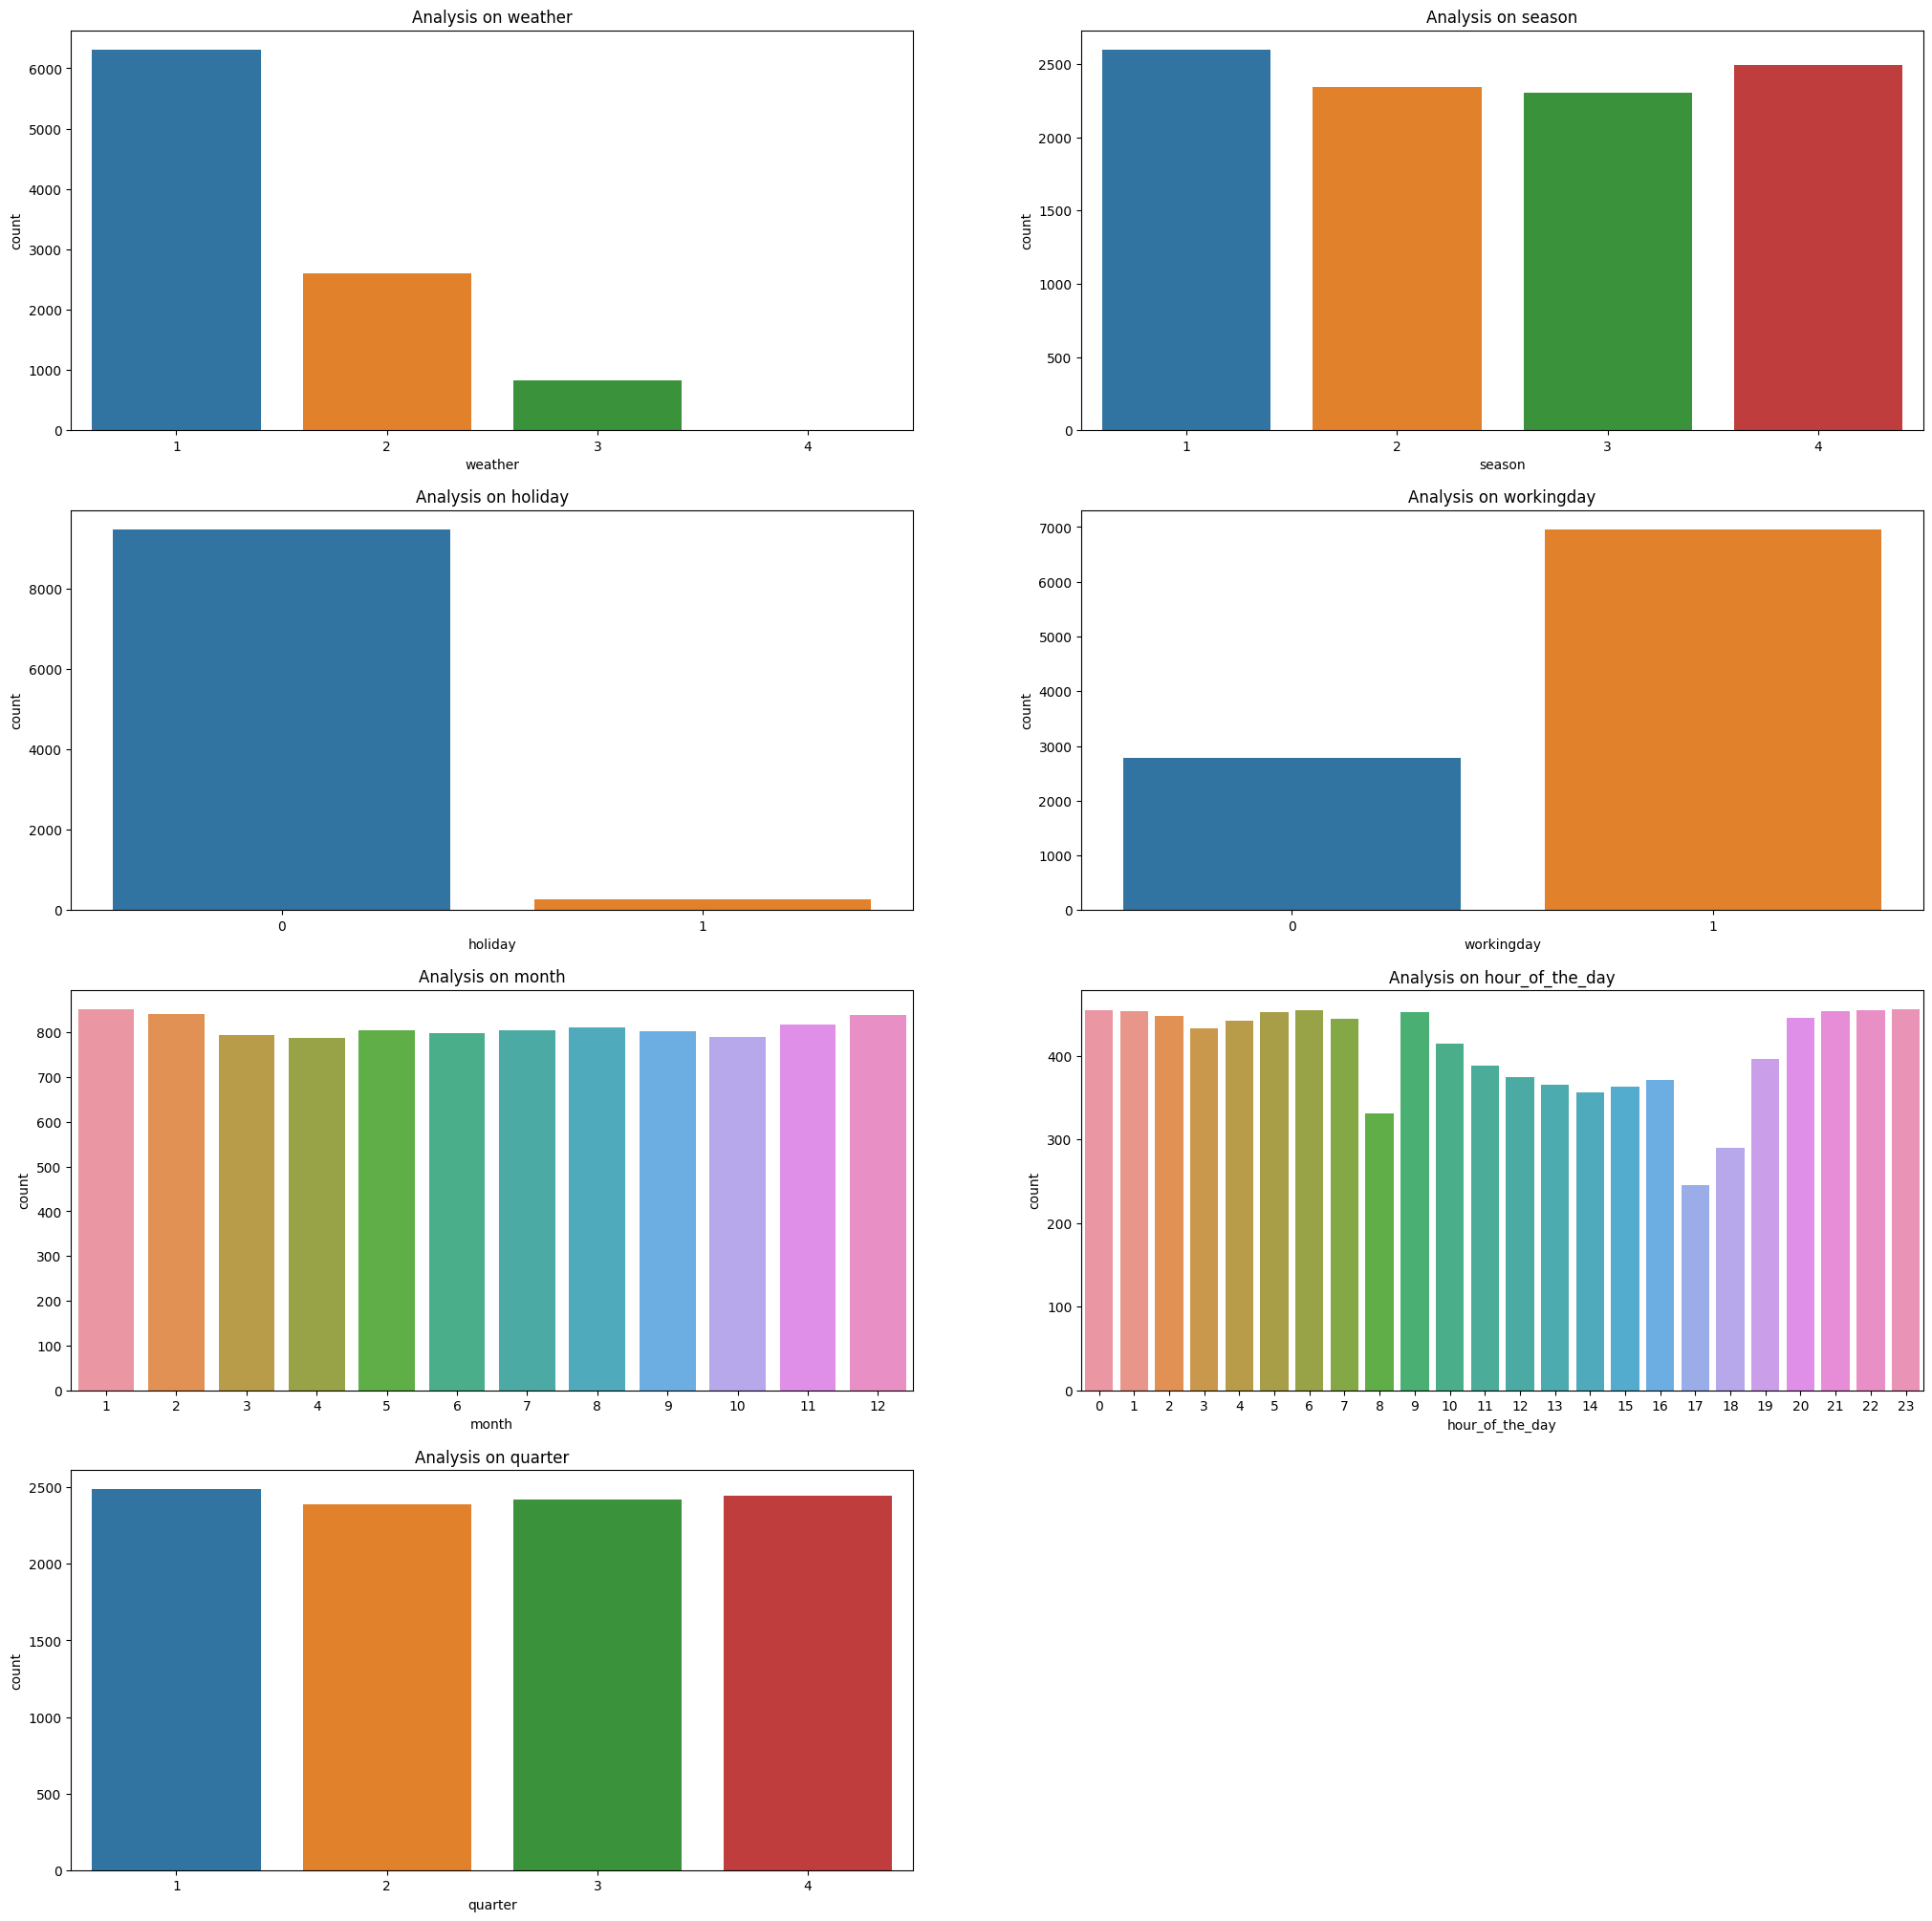

In [ ]:
# Analysis on the features provided with their corresponding count in the datapoints
plt.figure(figsize = (25,25))
features = ['weather', 'season', 'holiday', 'workingday',"month","hour_of_the_day","quarter"]
for i in range(len(features)):
     plt.subplot(4, 2, i+1)
     sns.countplot(x = final_df[features[i]])
     plt.title('Analysis on {}'.format(features[i]))

plt.show()


As we seen in the non-visual analysis, we can see the trends visually:

Clean and cloudy weather has maximum datapoints.

Spring and winter seasons have similar number of datapoints, similar trends is followed by season.

Working days and non-holidays have maximum datapoints.

Winters and falls months have the maximum datapoint.

Majority of the datapoints are during night, and lesser on the noon.

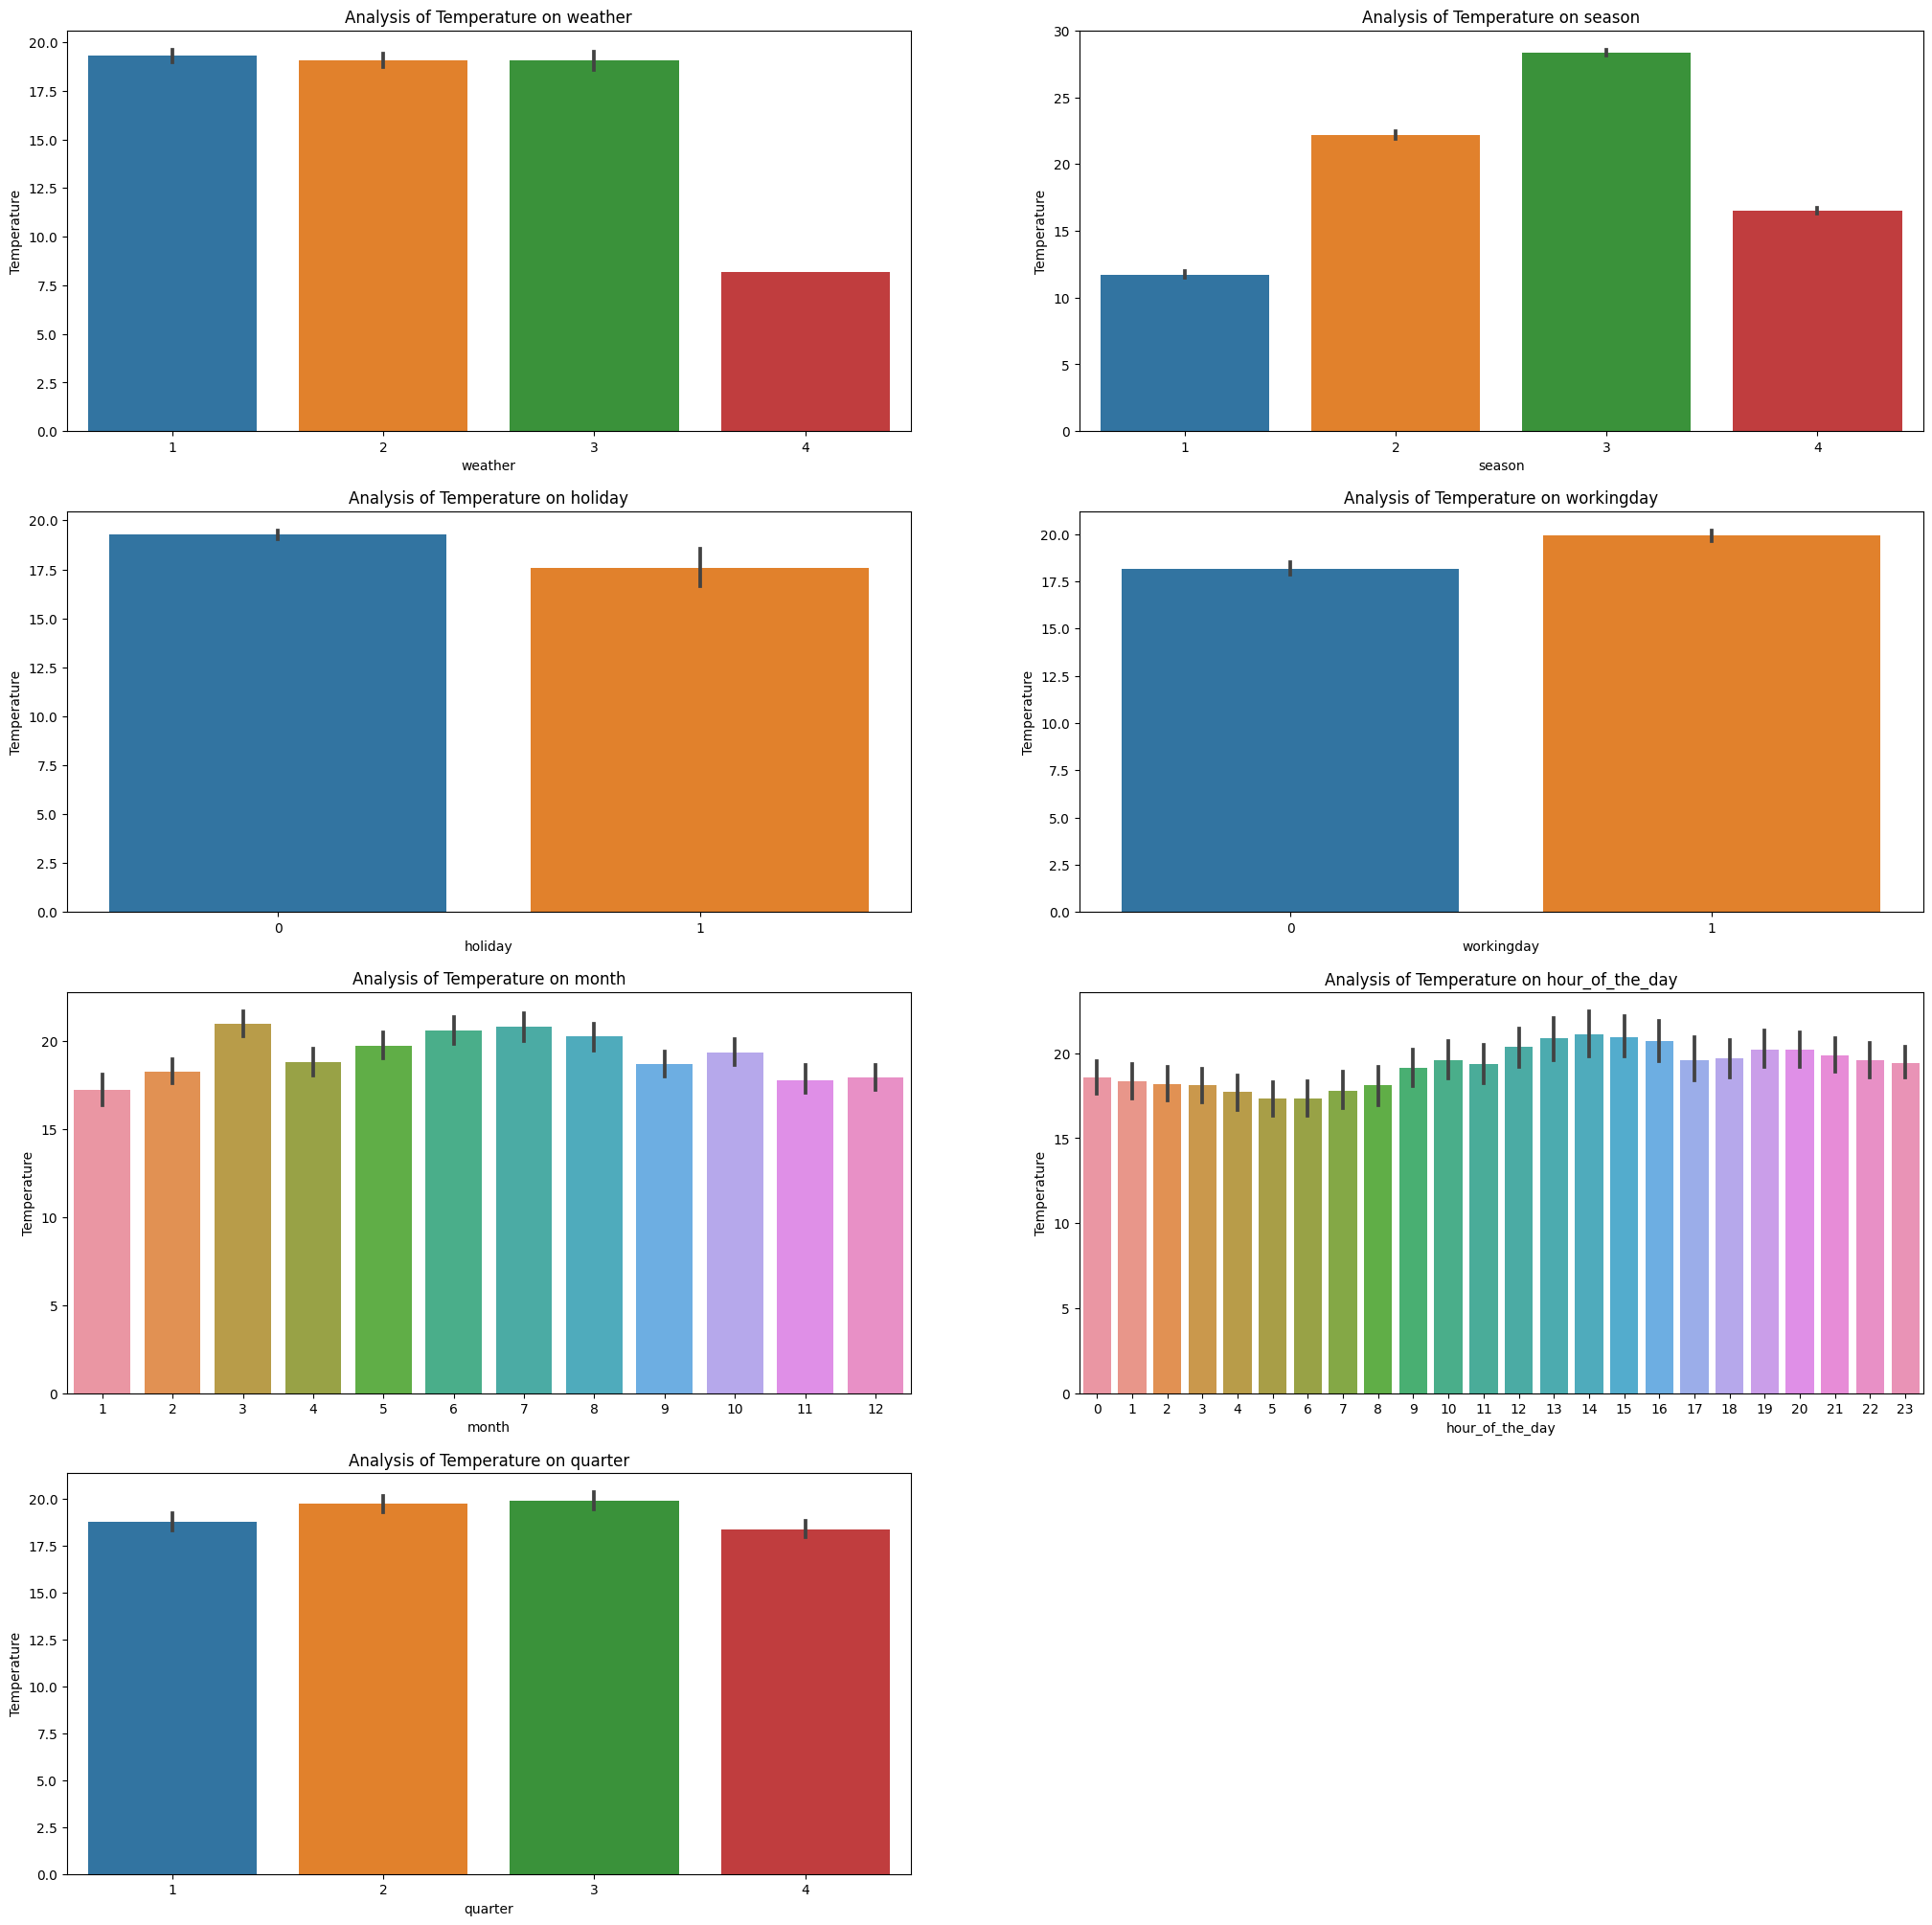

In [ ]:
# Plotting average temperature for all the features

plt.figure(figsize = (25,25))
features = ['weather', 'season', 'holiday', 'workingday',"month","hour_of_the_day","quarter"]
count_df =  final_df.groupby(features)["temp"].mean().reset_index()
for i in range(len(features)):
         plt.subplot(4, 2, i+1)
         sns.barplot(x = count_df[features[i]], y = count_df["temp"])
         plt.ylabel('Temperature')
         plt.title('Analysis of Temperature on {}'.format(features[i]))
plt.show()

Average temperature is higher in clean and cloudy weather, followed by mist and cloudy weather.

Average temperature is higher in fall season and in third quarter, then in summers or second quarter. This disruption is may be due to removal of outliers.

Average temperature is higher on working days and non-holidays.

Average temperature starts rising from March till November.

Average temperature stays similar throughout the day, with slightly higher during afternoon.

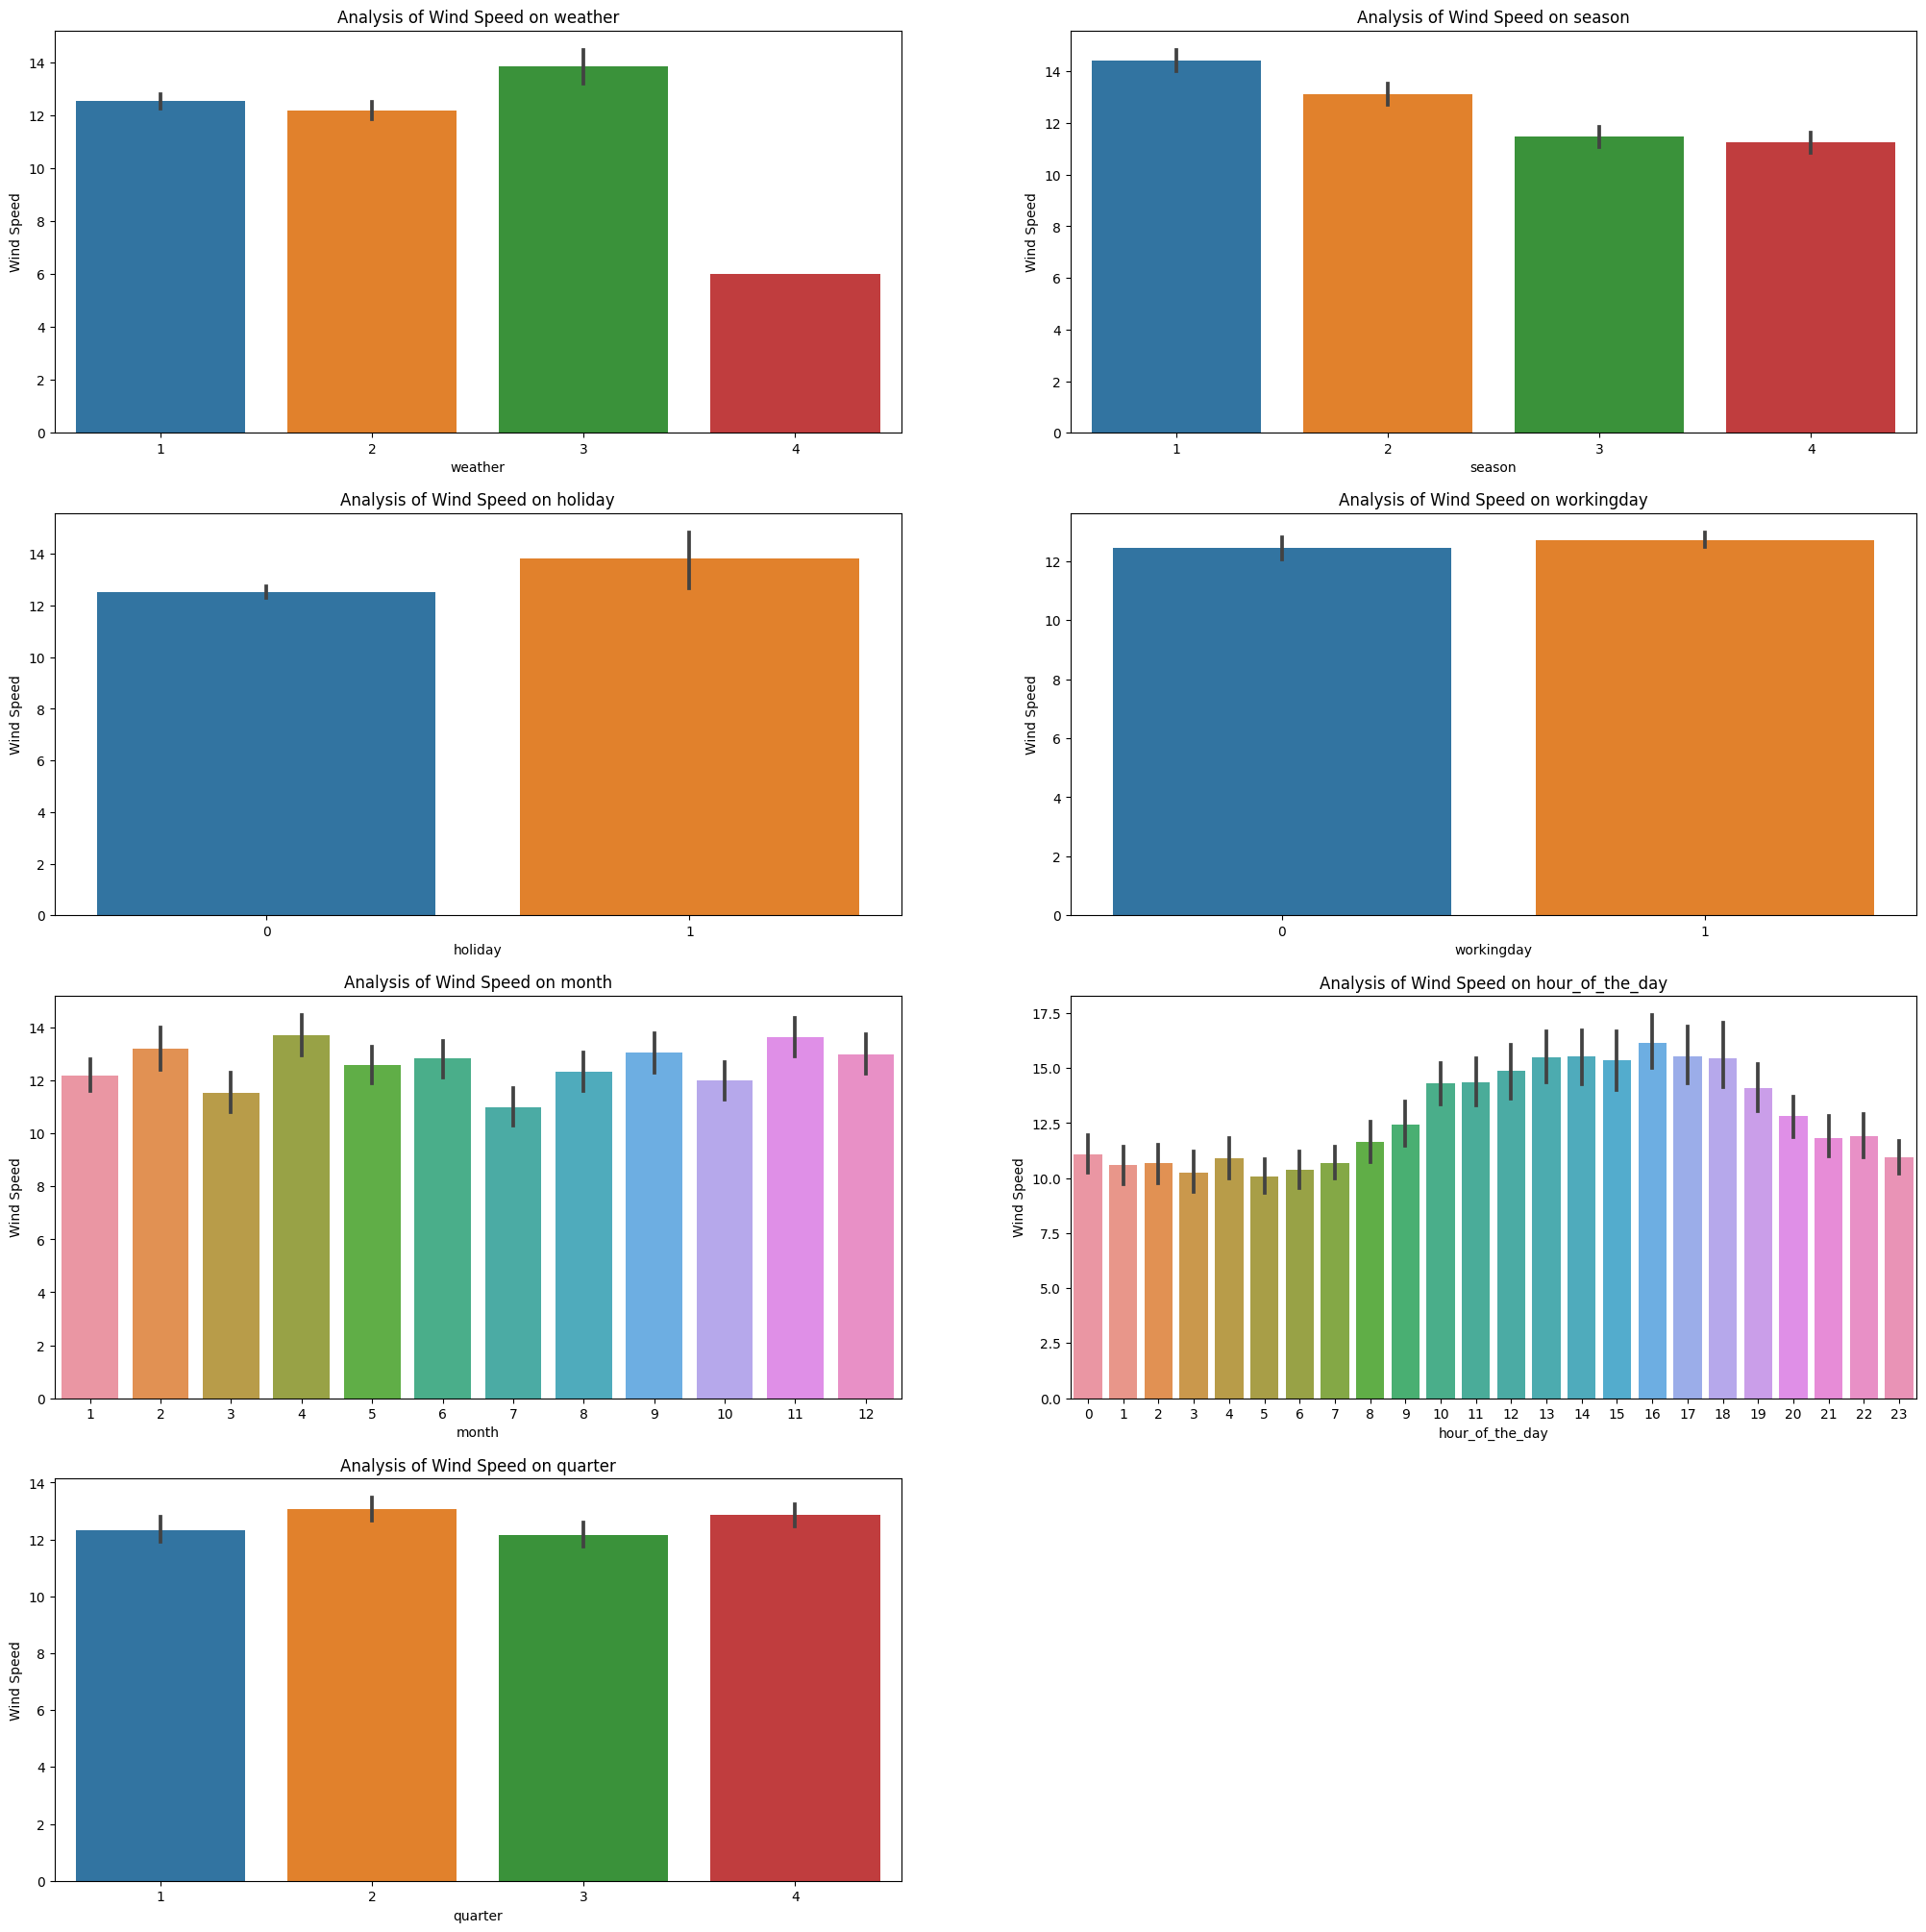

In [ ]:
# Plotting average wind speed for all the features

plt.figure(figsize = (25,25))
features = ['weather', 'season', 'holiday', 'workingday',"month","hour_of_the_day","quarter"]
count_df =  final_df.groupby(features)["windspeed"].mean().reset_index()
for i in range(len(features)):
         plt.subplot(4, 2, i+1)
         sns.barplot(x = count_df[features[i]], y = count_df["windspeed"])
         plt.ylabel('Wind Speed')
         plt.title('Analysis of Wind Speed on {}'.format(features[i]))
plt.show()

Average windspeed is higher in light snow and light rainy weather, followed by mist and cloudy weather.

Average windspeed is higher in spring season and in first quarter, then in summers or second quarter.

Average windspeed is similar on working days and non-holidays.

Average windspeed is higher in March and April, followed by in November.

Average windspeed stays rising from 10am till 5pm, and then start decreasing till midnight.

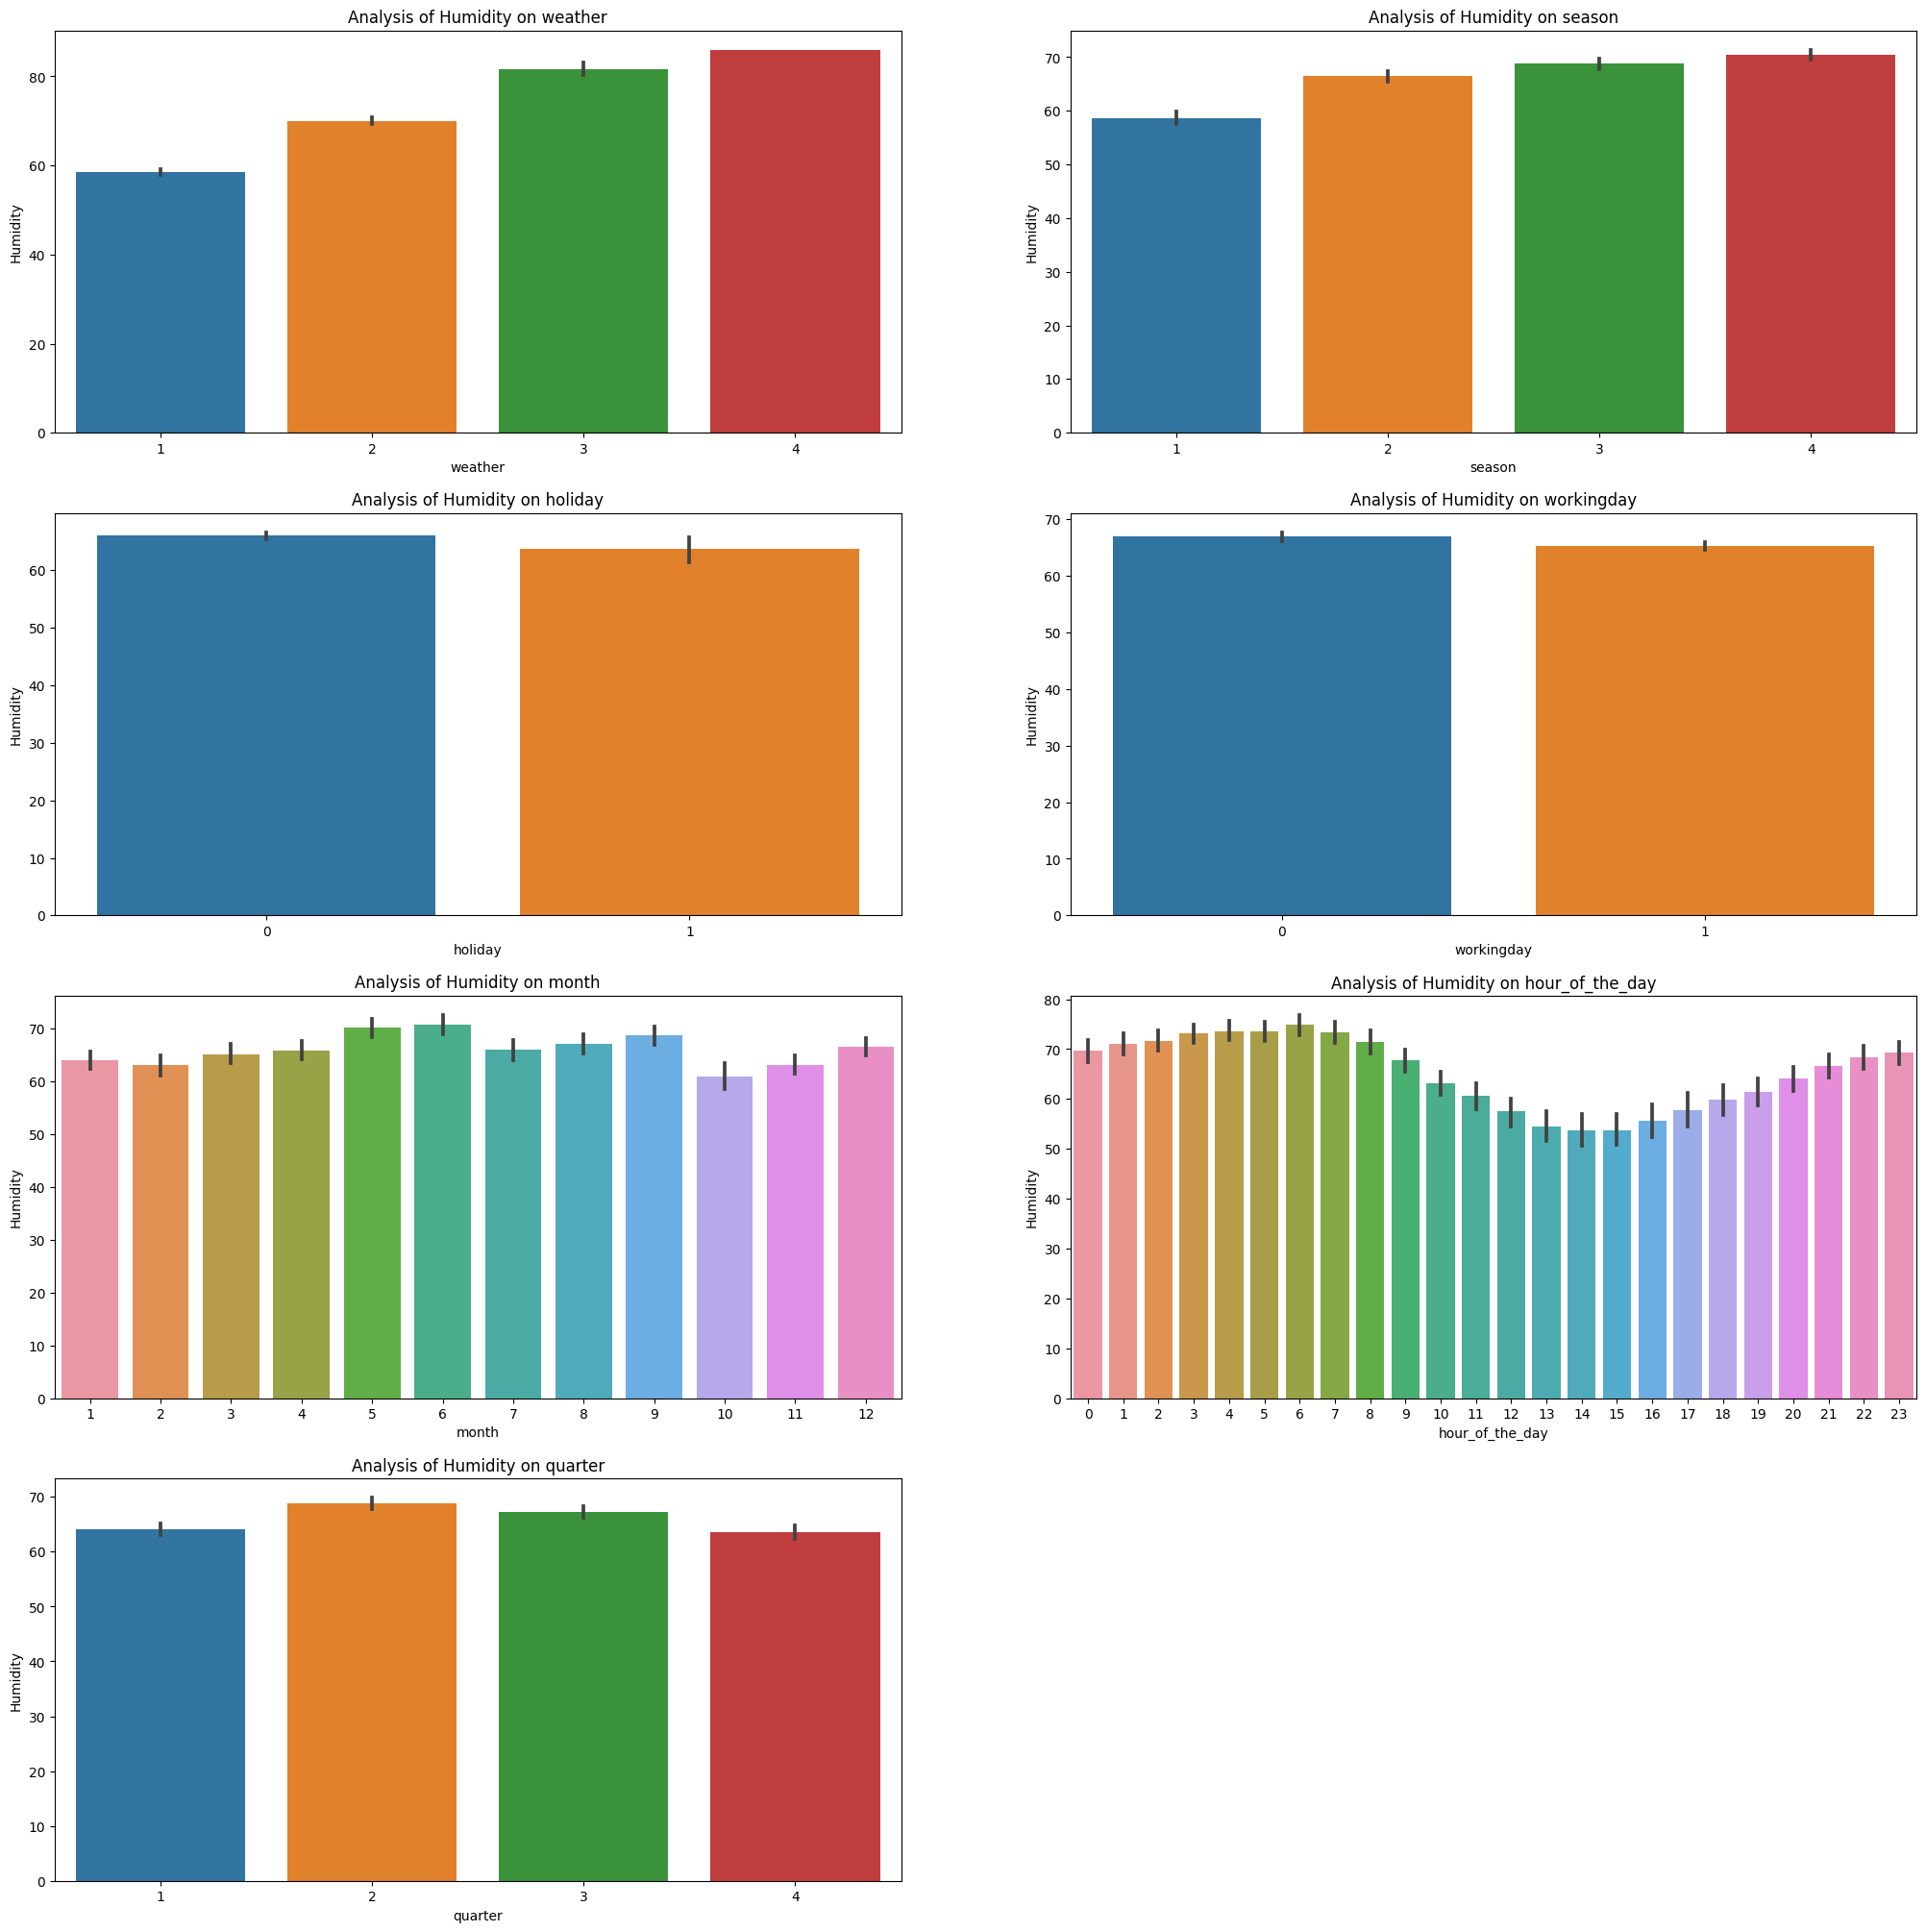

In [ ]:
# Plotting average humidity for all the features

plt.figure(figsize = (25,25))
features = ['weather', 'season', 'holiday', 'workingday',"month","hour_of_the_day","quarter"]
count_df =  final_df.groupby(features)["humidity"].mean().reset_index()
for i in range(len(features)):
         plt.subplot(4, 2, i+1)
         sns.barplot(x = count_df[features[i]], y = count_df["humidity"])
         plt.ylabel('Humidity')
         plt.title('Analysis of Humidity on {}'.format(features[i]))
plt.show()

Average humidity is higher in heavy rainy weather, followed by light snow and light rainy.

Average humidity is higher in fall season and in third quarter, then in summers or second quarter and winter or foruth quarter.

Average humidity is similar on working days and non-holidays.

Average humidity is higher in May and September, followed by in October and December.

Average humidity stays consistently higher from 12 midnight till 8am, and then start decreasing till 2pm, and again start slowly increasing till midnight.

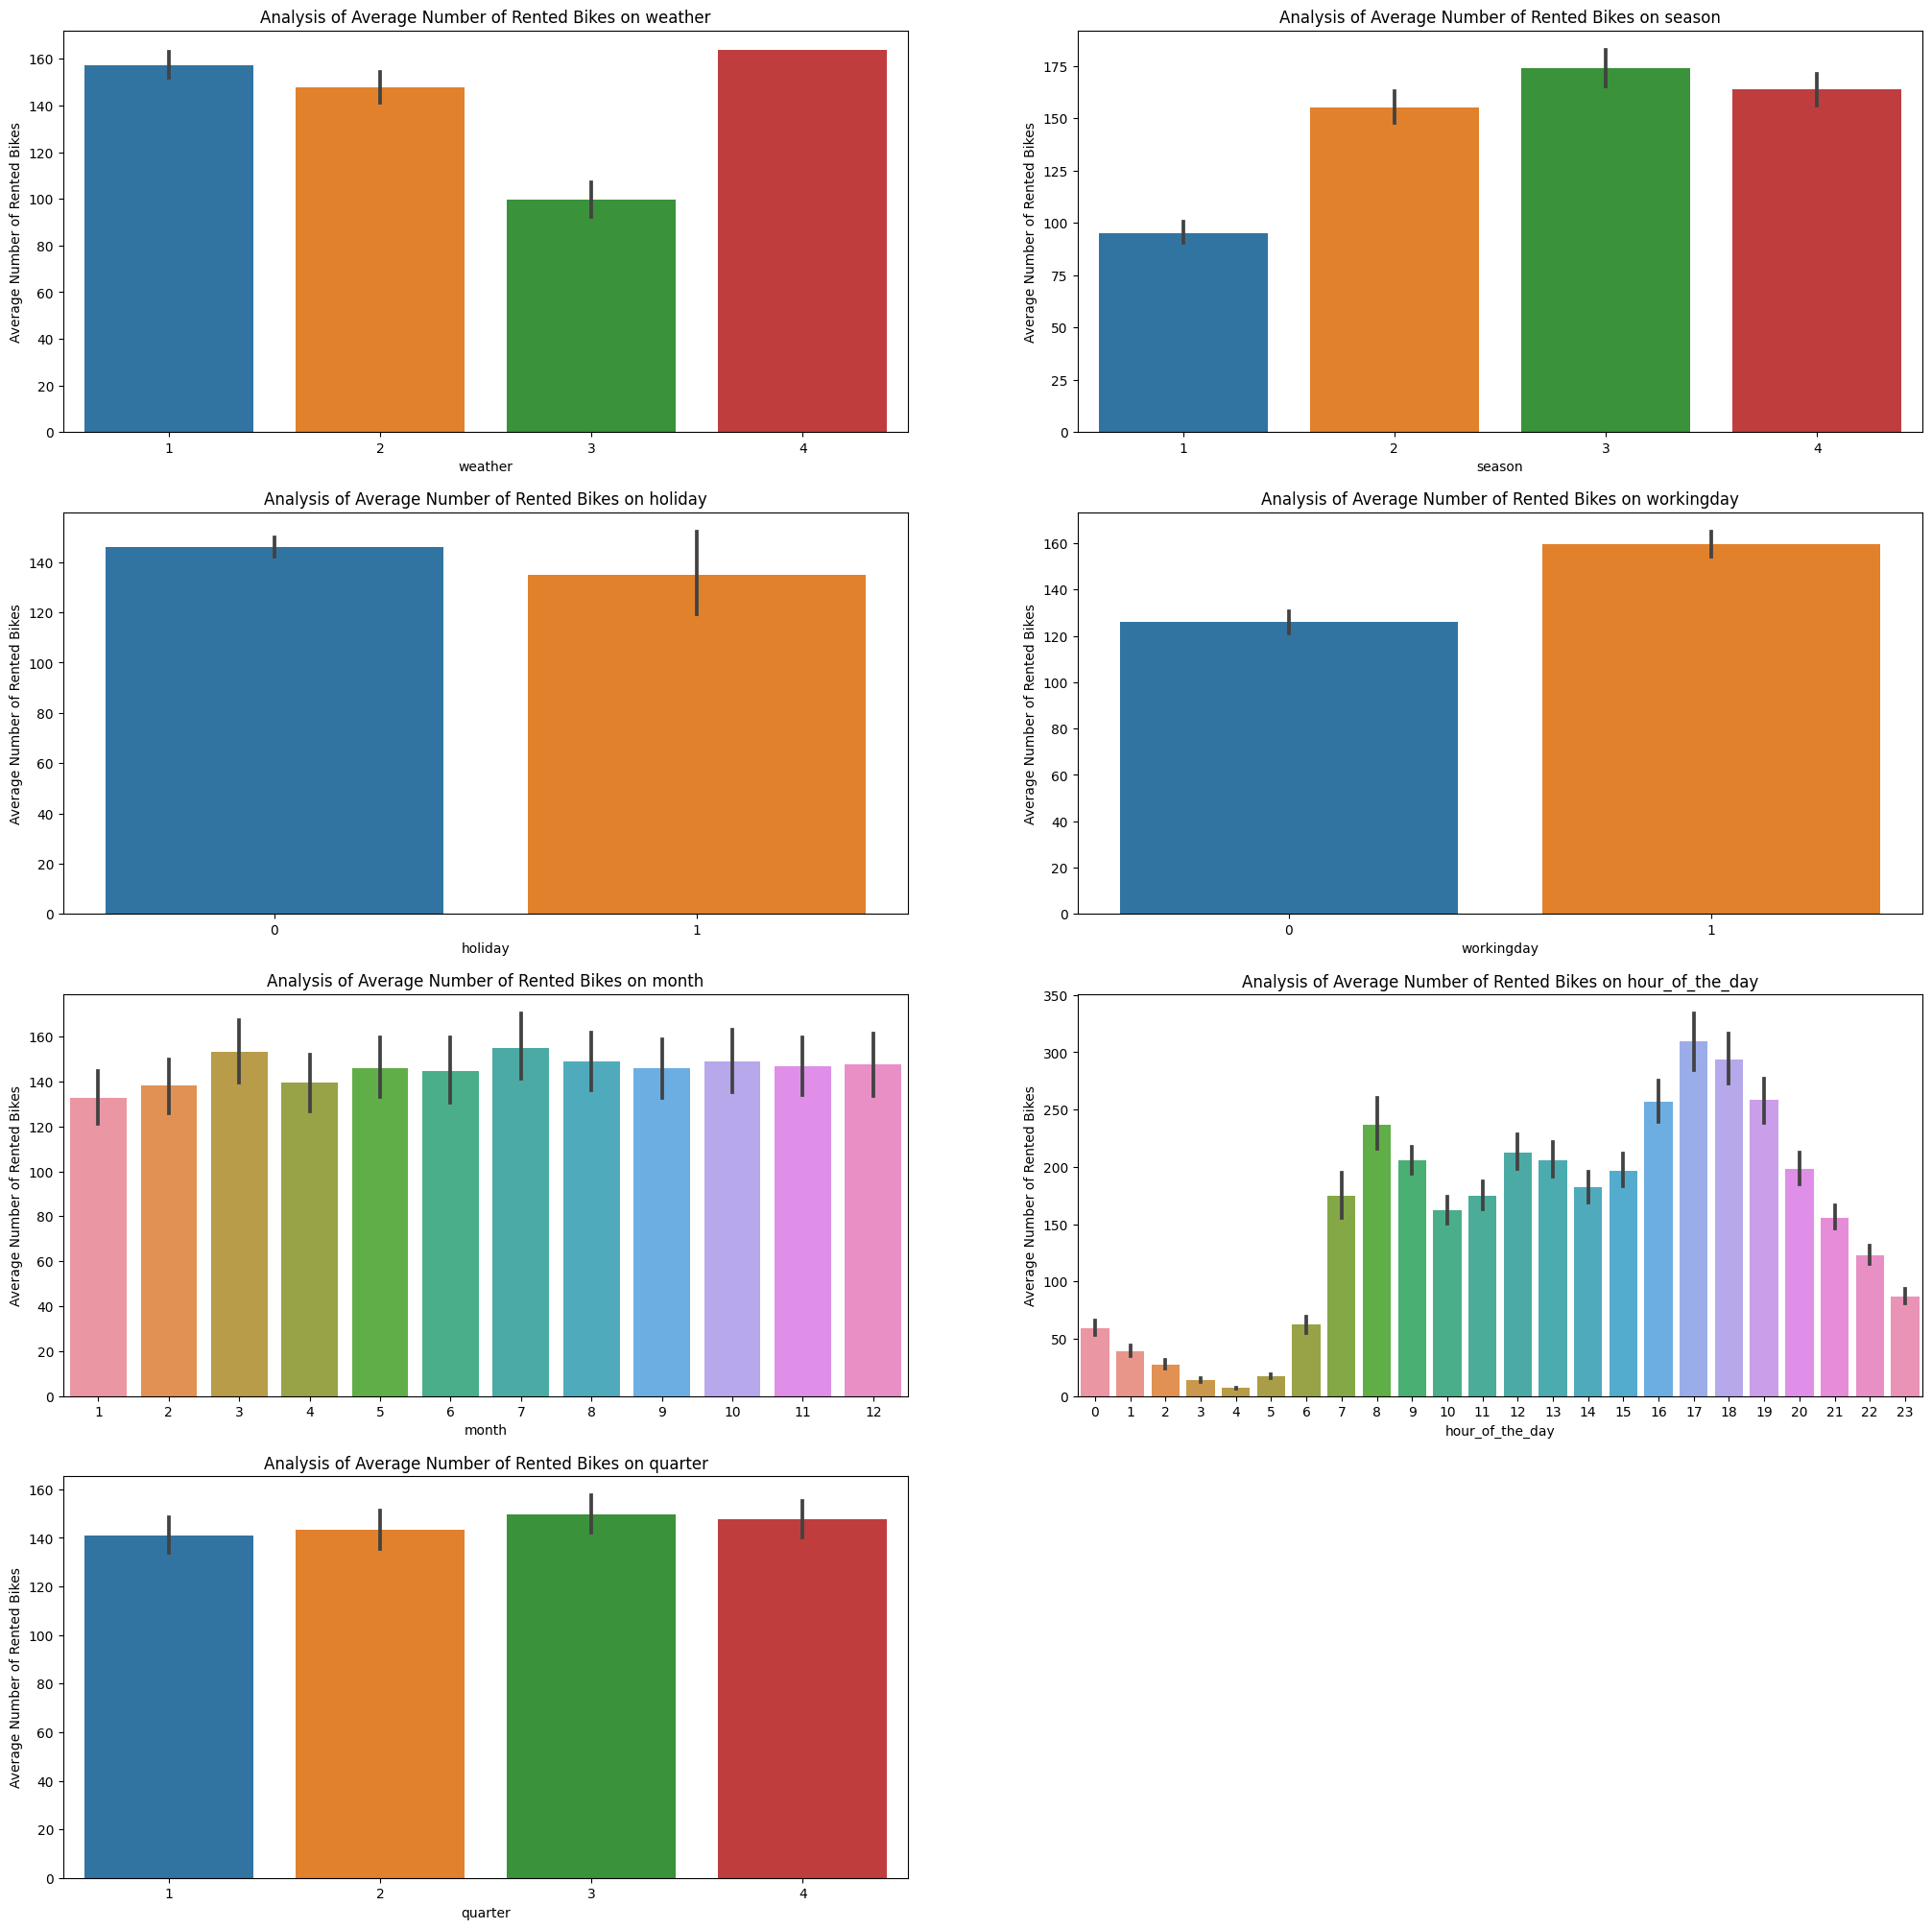

In [ ]:
# Plotting average count of rented bikes against all features

plt.figure(figsize = (25,25))
features = ['weather', 'season', 'holiday', 'workingday',"month","hour_of_the_day","quarter"]
count_df =  final_df.groupby(features)["count"].mean().reset_index()
for i in range(len(features)):
         plt.subplot(4, 2, i+1)
         sns.barplot(x = count_df[features[i]], y = count_df["count"])
         plt.ylabel('Average Number of Rented Bikes')
         plt.title('Analysis of Average Number of Rented Bikes on {}'.format(features[i]))
plt.show()

Average count of rented bikes is higher in clean and cloudy weather, followed by mist and cloudy weather. The higher number is heavy rain weather is due to the single datapoint present for that weather, causing higher number.

Average count of rented bikes is higher in fall season and in third quarter, then in summers or second quarter and winter or foruth quarter.

Average count of rented bikes is slightly more on working days and non-holidays.

Average count of rented bikes starts rising from January till August, followed by in October and starts decreasing till December.

Average count of rented bikes stays consistently higher from 7am till 9am, and then start decreasing till 3pm, and again start increasing till 7pm, with highest at 5pm.

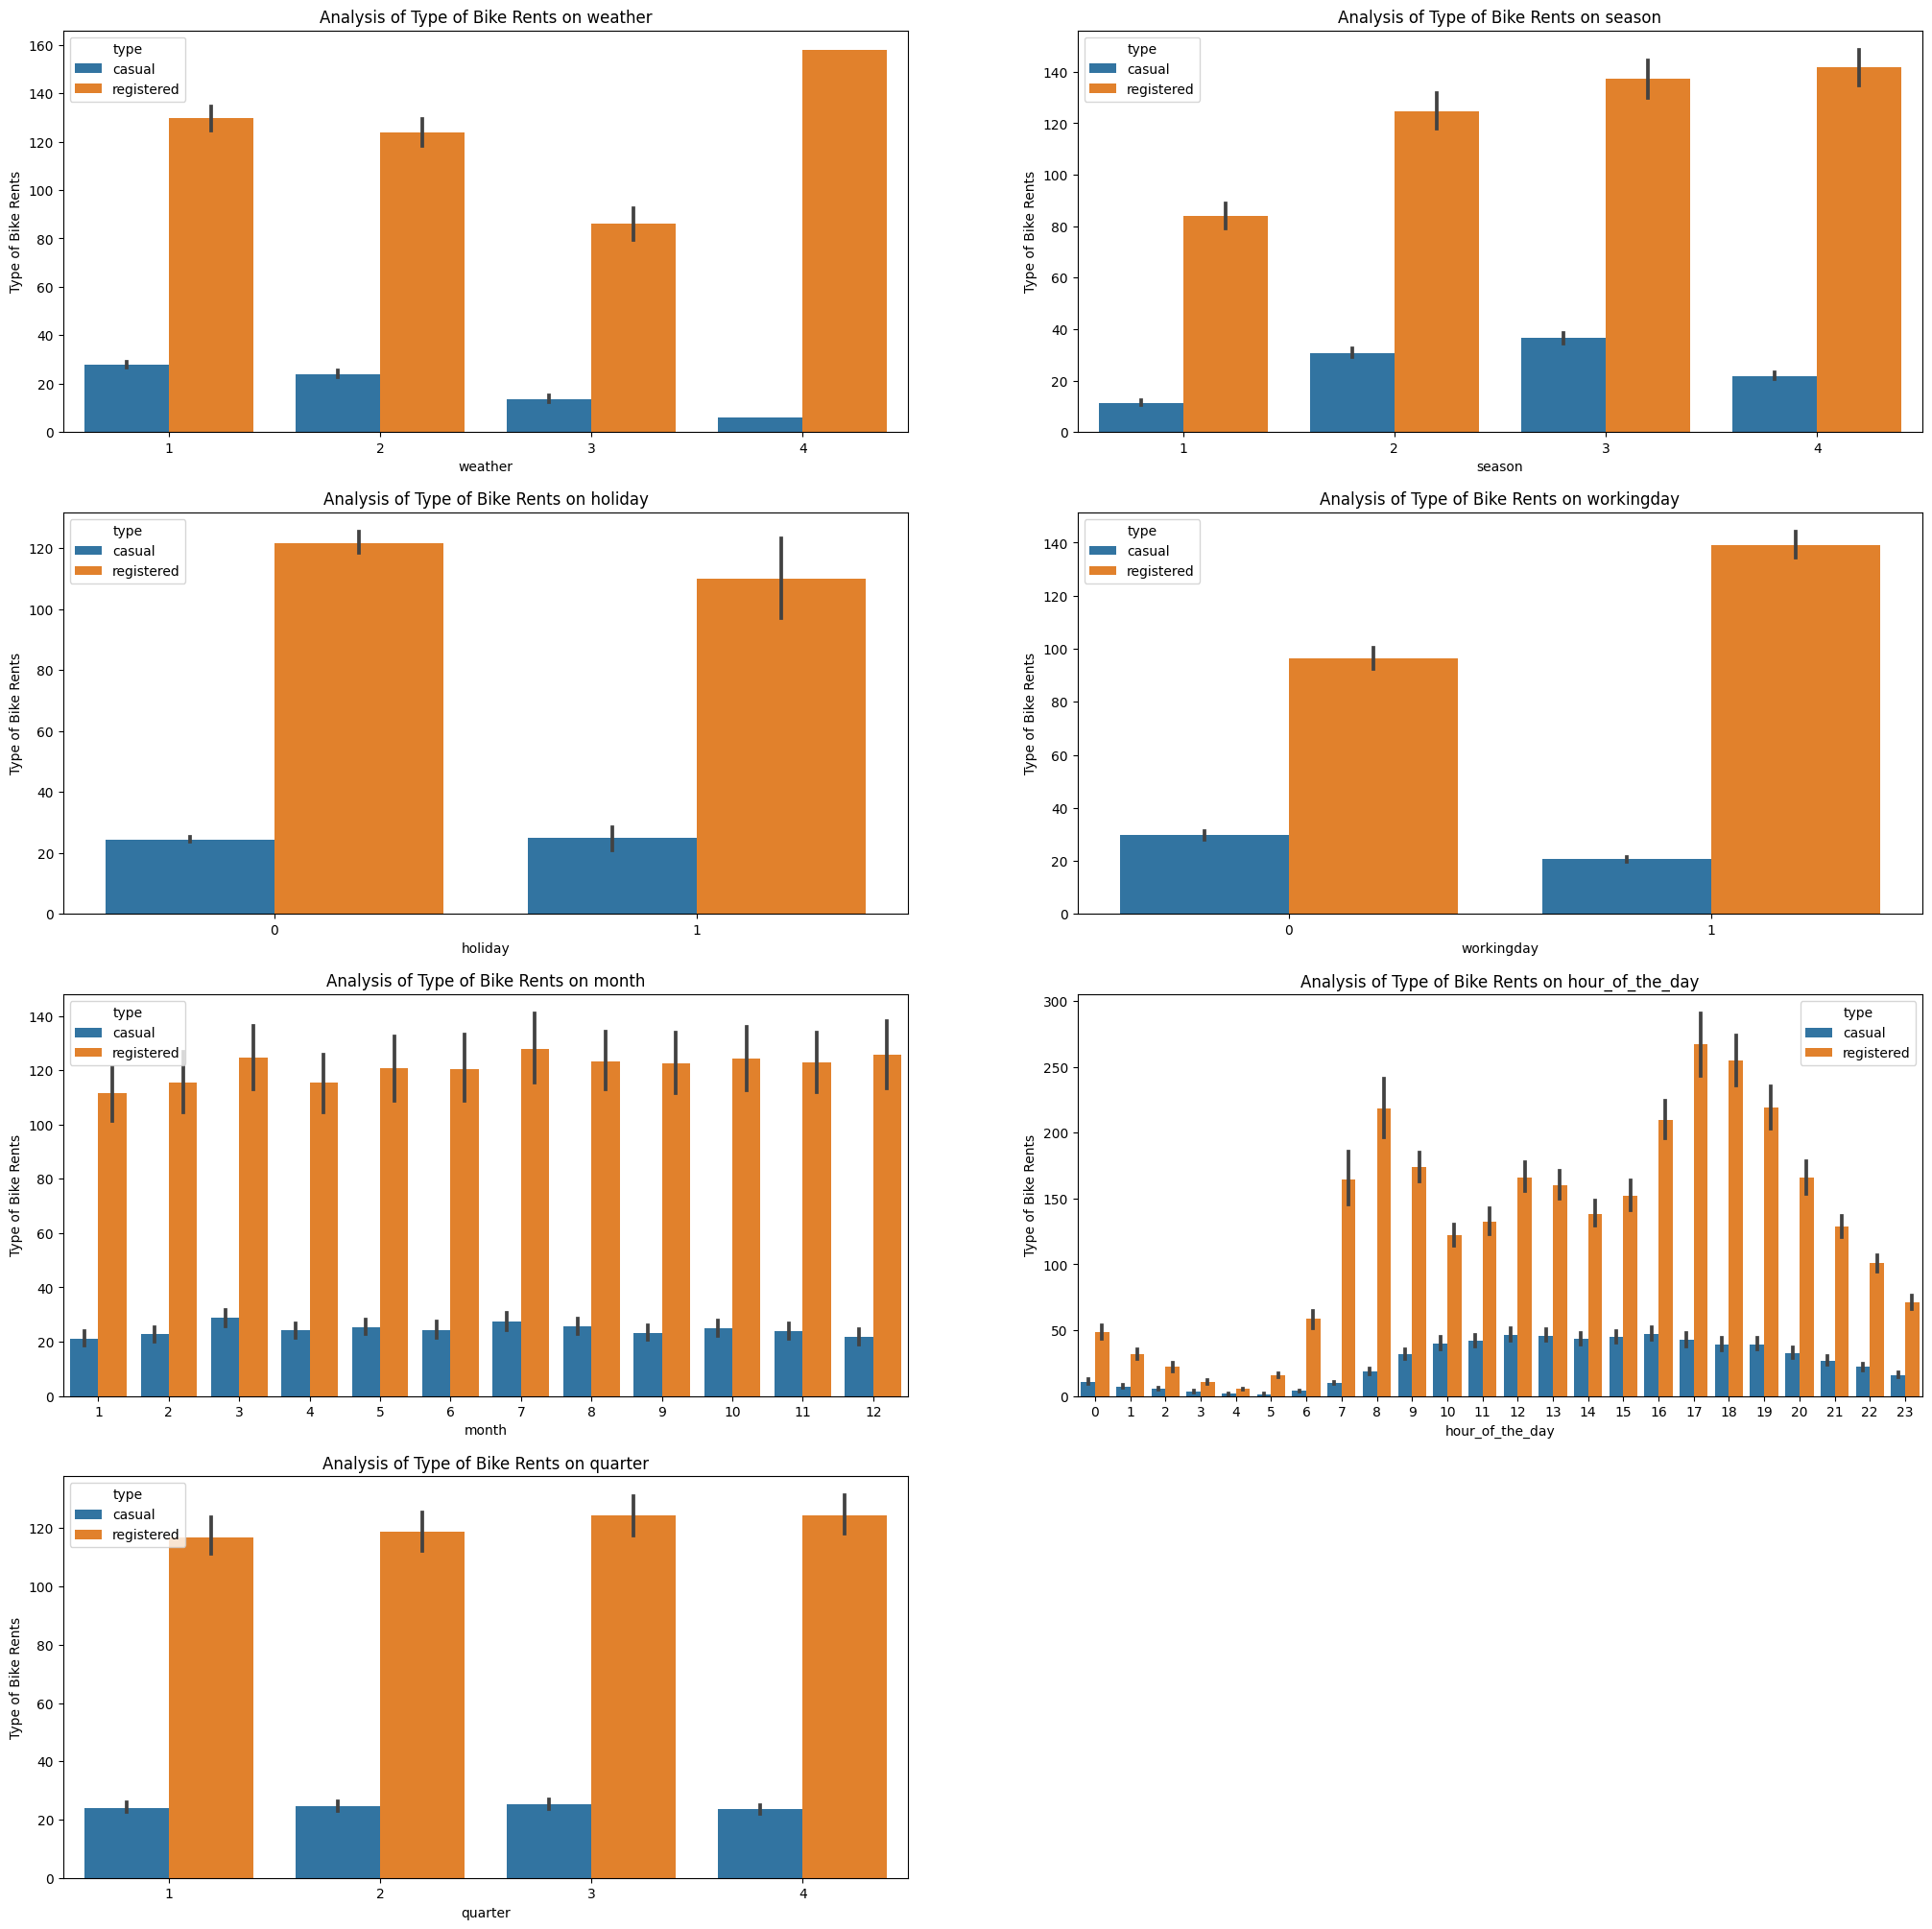

In [ ]:
# Plotting average count of registered and casual riders renting bikes against all features

plt.figure(figsize = (25,25))
features = ['weather', 'season', 'holiday', 'workingday',"month","hour_of_the_day","quarter"]
count_df =  final_df.groupby(features)[["casual","registered"]].mean().reset_index()
count_df = pd.melt(count_df,id_vars = features)
count_df.columns = ['weather', 'season', 'holiday', 'workingday',"month","hour_of_the_day","quarter","type","mean"]
for i in range(len(features)):
         plt.subplot(4, 2, i+1)
         sns.barplot(x = count_df[features[i]], y = count_df["mean"],hue= count_df["type"])
         plt.ylabel('Type of Bike Rents')
         plt.title('Analysis of Type of Bike Rents on {}'.format(features[i]))
plt.show()

Average count of registered riders renting bikes is significantly higher than count of casual riders.

Average count of registered and casual riders renting bikes is higher in clean and cloudy weather, followed by mist and cloudy weather. The higher number is heavy rain weather is due to the single datapoint present for that weather, causing higher number.

Average count of registered riders renting bikes is higher in winter season or in fourth quarter, while casual riders renting bikes prefer fall season or third quarter, then in summers or second quarter for casual riders and fall season or third quarter for registered ones.

Average count of registered riders renting bike is slightly more on working days and non-holidays. On contrast, casual riders rents bike more on holidays and non-working days.

Average count of registered and casual riders renting bikes starts rising from April till August, casual ridership falls after the month of August, however for registered users the numbers again increase in October and starts decreasing till December.

Average count of registered riders renting bikes stays consistently higher from 7am till 9am, and then start decreasing till 3pm, and again start increasing till 7pm, with highest at 5pm.

Hypothesis Testing

1. Whether Working Day has an effect on the count of rented electric bikes

In [ ]:
# Creating two different dataframes for working day count of renting bikes as working_day_df and non-working days count of renting bikes as holiday_df

working_day_df = final_df.loc[(final_df["workingday"]==True),"count"]
holiday_df = final_df.loc[(final_df["workingday"]==False),"count"]

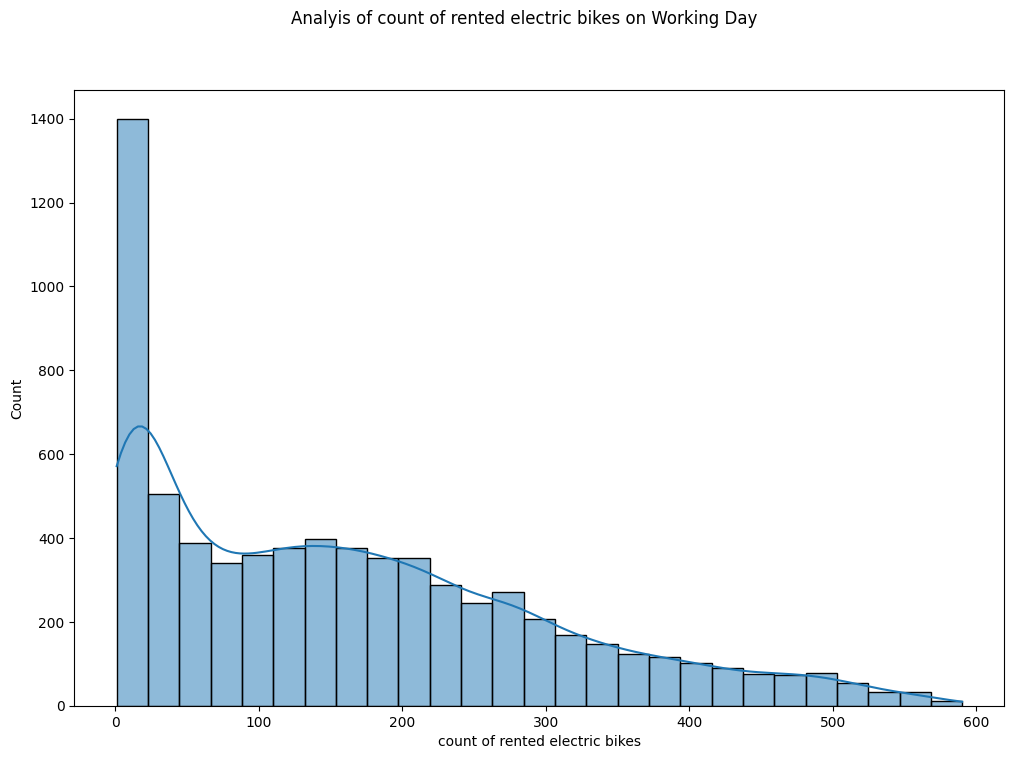

Confidence Interval: 95%
Wilkin-Shapiro test with Test Statistic: 0.9014756083488464, and p-value: 1.6598240790699492e-06
Reject Ho: Data is not Normally distributed


In [ ]:
# checking for the dataset's normal distribution with Wilkin-Shapiro Test

# Null Hypothesis(H0) : Data is Normally distributed
# Alternate Hypothesis(Ha) : Data is not Normally distributed

plt.figure(figsize = (12,8))
sns.histplot(working_day_df,kde=True)
plt.suptitle("Analyis of count of rented electric bikes on Working Day")
plt.xlabel("count of rented electric bikes")
plt.show()

working_day_sample_df = working_day_df.sample(100)
shapiro_stat,p_value = shapiro(working_day_sample_df)
alpha = 0.05
print("Confidence Interval: 95%")
print("Wilkin-Shapiro test with Test Statistic: {}, and p-value: {}".format(shapiro_stat,p_value))
if p_value < alpha:
    print("Reject Ho: Data is not Normally distributed")
else:
    print("Failed to reject Ho: Data is Normally distributed")

In [ ]:
# Check for Equal or Similar variance among the two groups

print("Variance for Working Day group is : {}\nVariance for Non-Working Day group is : {}".format(np.var(working_day_df),np.var(holiday_df)))
print("The Ratio of the above two is : {}".format(np.var(working_day_df)/np.var(holiday_df)))

Variance for Working Day group is : 19139.340295561404
Variance for Non-Working Day group is : 11308.06203886317
The Ratio of the above two is : 1.6925393785233895


Setting up Null and Alternate Hypothesis
Null Hypothesis (H0) = Working Day doesn't have impact on the count of rented electric cycles,i.e., count of rented electric bikes is same on working day and on holidays.

Alternate Hypothesis (Ha) = Working Day has an impact on the count of rented electric cycles,i.e., count of rented electric bikes is more on working day than on holidays.

Significance Value = 0.05

Although data is not normally distributed, we have two categories here, with working day being the categorical data and count being the numerical. Moreover, the ratio between in variance among the two groups is low. Thus applying Two Sample Independent T-Test.

In [ ]:
  # Implementing Two Sample Independent T-Test

test_statistic,p_value = ttest_ind(working_day_df,holiday_df,alternative="greater")
print("Two Sample Independent T-Test with Test Statistic: {}, and p-value: {}".format(test_statistic,p_value))
alpha = 0.05
print("Confidence Interval: 95%")
if p_value < alpha:
    print("Reject Ho: Working Day has an impact on the count of rented electric cycles,i.e., count of rented electric bikes is more on working day than on holidays.")
else:
    print("Failed to reject Ho: Working Day doesn't have impact on the count of rented electric cycles,i.e., count of rented electric bikes is same as on working day than on holidays.")

Two Sample Independent T-Test with Test Statistic: 14.122552537877892, and p-value: 3.8137606881498196e-45
Confidence Interval: 95%
Reject Ho: Working Day has an impact on the count of rented electric cycles,i.e., count of rented electric bikes is more on working day than on holidays.


We have created two different datasets for working days and non-working days(holidays) from the final_df. After this, we have checked the data for normality in the distribution using Wilkin-Shapiro test, unfortunately, the data doesn't follow normal distribution.

We have set-up the Null and Alternate hypothesis, as these data have two categories and the data is independent from each other, therefore, we have used Two Sample Independent T-Test on the data and checked the result with 95% confidence interval.

We found that: Since p-value is less than the significance level of 0.05, we can reject the null hypothesis and can conclude that Working Day has an impact on the count of rented electric cycles,i.e., count of rented electric bikes is more on working day than on holidays.